# **Ensemble intrusion detection Model**

# Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

mounting drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pip install -q kaggle

# Datasets links

In [ ]:
#https://www.dropbox.com/scl/fo/8kll7yvbgogkp0vahowvm/ADhDIC8LRFL8wHUexib3C3w?rlkey=43n570cnodtq6yls139r4yvn7&e=2&st=uronu6mh&dl=0
#https://www.kaggle.com/datasets/hassan06/nslkdd
#https://www.kaggle.com/datasets/cyberdeeplearning/ciciomt2024
#https://www.kaggle.com/datasets/amaniabourida/ton-iot
#https://www.kaggle.com/datasets/abdelmoumendbh/ciciomt2024-log-scaling-label-encoding

# DATA COLLECTION

## NSL-KDD dataset

The NSL-KDD dataset is a refined version of the KDD Cup 1999 dataset, specifically designed for evaluating Intrusion Detection Systems (IDS). It overcomes several critical shortcomings of the original KDD dataset, such as redundant records and an uneven distribution of attack types, which often led to biased and inaccurate evaluation of machine learning models.

In essence, NSL-KDD offers a more realistic and balanced benchmark for training and testing IDS models. It helps researchers develop and assess the effectiveness of intrusion detection techniques more accurately, ultimately contributing to the creation of more robust and reliable cybersecurity solutions.

In [ ]:
# this is the link to download the dataset from kaggle
#!kaggle datasets download -d hassan06/nslkdd

Dataset URL: https://www.kaggle.com/datasets/hassan06/nslkdd
License(s): unknown
  0% 0.00/13.9M [00:00<?, ?B/s]
100% 13.9M/13.9M [00:00<00:00, 995MB/s]


In [ ]:
#!unzip -q nslkdd.zip -d nslkdd

The NSL KDD dataset has been split into train and test data

### Analysis of NSL-KDD Datasets:


**KDDTrain+.txt**

This dataset contains 125,973 entries and is primarily used for training. It includes 'normal' traffic and a variety of known attack types (e.g., 'neptune', 'satan', 'ipsweep', 'smurf').

**KDDTest+.txt**

This dataset is smaller with 22,544 entries, designed for testing. Crucially, it contains several novel attack types that are not present in KDDTrain+.txt (e.g., 'mscan', 'warezmaster', 'apache2', 'processtable', 'snmpguess', 'httptunnel', 'named', 'ps', 'sendmail', 'xterm', 'xlock', 'xsnoop', 'worm', 'sqlattack', 'udpstorm').

This characteristic is intentional in NSL-KDD to evaluate how well an intrusion detection system can generalize to new, unseen threats.

In [ ]:
import os
import shutil



# Paths
src_folder = "/content/nslkdd"
dst_folder = "/content/drive/MyDrive/Datasets/nsl_kdd"

# Create the destination folder if it doesn't exist
os.makedirs(dst_folder, exist_ok=True)

# Copy the contents of the extracted folder
for item in os.listdir(src_folder):
    s = os.path.join(src_folder, item)
    d = os.path.join(dst_folder, item)
    if os.path.isdir(s):
        shutil.copytree(s, d, dirs_exist_ok=True)
    else:
        shutil.copy2(s, d)

print(f"✅ Extracted contents saved permanently to: {dst_folder}")


✅ Extracted contents saved permanently to: /content/drive/MyDrive/Datasets/nsl_kdd


In [ ]:
KDD_Train = "/content/drive/MyDrive/Datasets/nsl_kdd/KDDTrain+.txt"
KDD_test = "/content/drive/MyDrive/Datasets/nsl_kdd/KDDTest+.txt"

In [ ]:
df_kdd_train = pd.read_csv(KDD_Train)
df_kdd_test = pd.read_csv(KDD_test)

In [ ]:
# taking a look on the train dataset
df_kdd_train.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [ ]:
#taking a look on the test dataset
df_kdd_test.head()

,0,tcp,private,REJ,0.1,0.2,0.3,0.4,0.5,0.6,...,0.04.1,0.06.1,0.00.3,0.00.4,0.00.5,0.00.6,1.00.2,1.00.3,neptune,21
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21


Merging the two datasets

#### **Reasons why we are merging the two**

**Increased Data Volume**
Deep learning models typically perform much better with more data. By combining both, our new dataset will now have around a total of 148,517 records. This larger volume provides more examples for our model to learn from.

**Richer Attack Variety**
The most significant advantage of merging is the inclusion of all attack types from both the training and test sets. This means our combined dataset now covers a broader spectrum of network intrusions, including those novel attacks that a system might encounter in a real-world scenario. A model trained on this comprehensive dataset will be more robust and better equipped to identify diverse threats.

**Improved Generalization**
Exposing your deep learning model to this wider range of normal and attack patterns will help it develop better generalization capabilities, making it more effective in detecting various forms of network intrusions.

**Preprocessing for Consistency**

To make this dataset ready for deep learning and consistent with your previous hospital datasets, I've done the following:

I used the standard 43 column names for the NSL-KDD dataset (41 features + attack + level).

I've added a new label column to the merged dataset. In this label column, 'normal' traffic is assigned a value of 0, and all types of attacks are assigned a value of 1. This provides a clear binary classification target for your models.

The distribution of the new label column in our merged NSL-KDD dataset is:

**Normal** (0): 77,054 entries

**Attack** (1): 71,463 entries


This balanced distribution is beneficial for training robust intrusion detection models.

In [ ]:
import pandas as pd

# Column names for the NSL-KDD dataset
columns = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land',
    'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
    'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
    'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
    'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
    'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
    'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
    'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate',
    'attack', 'level'
]

# Load KDDTrain+.txt
train_df = pd.read_csv("/content/drive/MyDrive/Datasets/nsl_kdd/KDDTrain+.txt", header=None, names=columns)

# Load KDDTest+.txt
test_df = pd.read_csv("/content/drive/MyDrive/Datasets/nsl_kdd/KDDTest+.txt", header=None, names=columns)

# Concatenate the two DataFrames
nslkdd_merged_df = pd.concat([train_df, test_df], ignore_index=True)

# Converting the 'attack' column to a binary label: 0 for 'normal', 1 for any attack type
nslkdd_merged_df['label'] = nslkdd_merged_df['attack'].apply(lambda x: 0 if x == 'normal' else 1)

# Display the value counts of the 'label' column in the merged DataFrame
print("Value counts for 'label' in the merged NSL-KDD dataset:")
print(nslkdd_merged_df['label'].value_counts())


Value counts for 'label' in the merged NSL-KDD dataset:
label
0    77054
1    71463
Name: count, dtype: int64


**Merged NSL_KDD**

In [ ]:
import os


# Define destination path
output_filename = 'nslkdd_merged_dataset.csv'
destination_folder = "/content/drive/MyDrive/Datasets/nsl_kdd"
os.makedirs(destination_folder, exist_ok=True)

# Full path to save
full_path = os.path.join(destination_folder, output_filename)

# Save the DataFrame
nslkdd_merged_df.to_csv(output_filename, index=False)

print(f"✅ Dataset saved permanently to: {full_path}")



✅ Dataset saved permanently to: /content/drive/MyDrive/Datasets/nsl_kdd/nslkdd_merged_dataset.csv


In [ ]:
df_nsl_kdd_merged_dataset = pd.read_csv("/content/drive/MyDrive/Datasets/nsl_kdd/nslkdd_merged_dataset.csv")

In [ ]:
df_nsl_kdd_merged_dataset.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,0
1,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,0
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,1
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,0
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,0


checking the shape

In [ ]:
df_nsl_kdd_merged_dataset.shape

(148517, 44)

### Data Cleaning

In [ ]:
df_nsl_kdd_merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148517 entries, 0 to 148516
Data columns (total 44 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     148517 non-null  int64  
 1   protocol_type                148517 non-null  object 
 2   service                      148517 non-null  object 
 3   flag                         148517 non-null  object 
 4   src_bytes                    148517 non-null  int64  
 5   dst_bytes                    148517 non-null  int64  
 6   land                         148517 non-null  int64  
 7   wrong_fragment               148517 non-null  int64  
 8   urgent                       148517 non-null  int64  
 9   hot                          148517 non-null  int64  
 10  num_failed_logins            148517 non-null  int64  
 11  logged_in                    148517 non-null  int64  
 12  num_compromised              148517 non-null  int64  
 13 

In [ ]:
df_nsl_kdd_merged_dataset.isnull().sum()

,0
duration,0
protocol_type,0
service,0
flag,0
src_bytes,0
dst_bytes,0
land,0
wrong_fragment,0
urgent,0
hot,0


checking if the data labels are balanced after merging the dataset

label
0    77054
1    71463
Name: count, dtype: int64


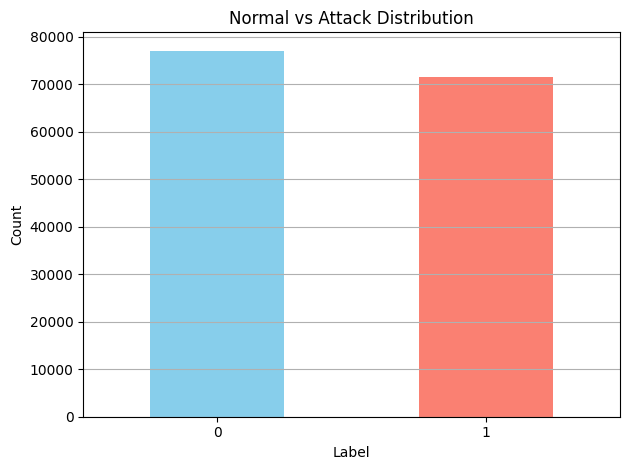

In [ ]:
# Checking the distribution of the labels
print(df_nsl_kdd_merged_dataset['label'].value_counts())

# visualizing it using a bar plot
import matplotlib.pyplot as plt

df_nsl_kdd_merged_dataset['label'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Normal vs Attack Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


The distibution of labels looks great

In [ ]:
# make labels easier to interpret
df_nsl_kdd_merged_dataset['label'] = df_nsl_kdd_merged_dataset['label'].map({0: 'Normal', 1: 'Attack'})


In [ ]:
from sklearn.utils import resample

# Separate classes
df_normal = df_nsl_kdd_merged_dataset[df_nsl_kdd_merged_dataset['label'] == 'Normal']
df_attack = df_nsl_kdd_merged_dataset[df_nsl_kdd_merged_dataset['label'] == 'Attack']

# Upsample Attack to match Normal count
df_attack_upsampled = resample(
    df_attack,
    replace=True,
    n_samples=len(df_normal),  # Match number of Normal samples
    random_state=42
)

# Combine and update the original DataFrame
df_nsl_kdd_merged_dataset = pd.concat([df_normal, df_attack_upsampled])
df_nsl_kdd_merged_dataset = df_nsl_kdd_merged_dataset.sample(frac=1, random_state=42).reset_index(drop=True)



In [ ]:
# Confirm new balance
df_nsl_kdd_merged_dataset['label'].value_counts()


,count
label,
Normal,77054
Attack,77054


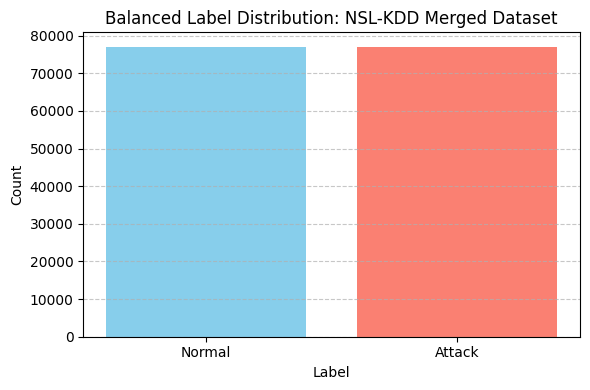

In [ ]:
import matplotlib.pyplot as plt

label_counts = df_nsl_kdd_merged_dataset['label'].value_counts()
colors = ['skyblue' if label == 'Normal' else 'salmon' for label in label_counts.index]

plt.figure(figsize=(6, 4))
plt.bar(label_counts.index, label_counts.values, color=colors)
plt.title('Balanced Label Distribution: NSL-KDD Merged Dataset')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
# Save to CSV in the current working directory
destination_folder = "/content/drive/MyDrive/Datasets/nsl_kdd"
os.makedirs(destination_folder, exist_ok=True)

# Save the merged dataset CSV
nsl_save_path = os.path.join(destination_folder, 'df_nsl_kdd_merged_dataset.csv')
df_nsl_kdd_merged_dataset.to_csv(nsl_save_path, index=False)

print(f"✅ NSL-KDD merged dataset saved to: {nsl_save_path}")


✅ NSL-KDD merged dataset saved to: /content/drive/MyDrive/Datasets/nsl_kdd/df_nsl_kdd_merged_dataset.csv


**DEEP LEARNING MODEL**

we are back to fit the domain specific final dataset with our final model and track perfomance parameters as we compair  with final model on the robust dataset

In [ ]:
df_final_nsl_kdd = pd.read_csv("/content/drive/MyDrive/Datasets/nsl_kdd/df_nsl_kdd_merged_dataset.csv")

In [ ]:
df_final_nsl_kdd.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,label
0,0,tcp,http,SF,222,1236,0,0,0,0,...,0.0,0.01,0.03,0.0,0.0,0.00,0.00,normal,21,Normal
1,0,tcp,http,SF,54540,8314,0,0,0,2,...,0.0,0.01,0.00,0.0,0.0,0.04,0.04,back,11,Attack
2,0,tcp,http,SF,381,536,0,0,0,0,...,0.0,1.00,0.01,0.0,0.0,0.00,0.00,normal,20,Normal
3,0,udp,domain_u,SF,44,110,0,0,0,0,...,0.0,1.00,0.01,0.0,0.0,0.00,0.00,normal,21,Normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,1.0,0.00,0.00,0.1,0.0,0.89,1.00,satan,20,Attack


In [ ]:
df_final_nsl_kdd['label'].value_counts()


,count
label,
Normal,77054
Attack,77054


In [ ]:
df_final_nsl_kdd['Label_Code'] = df_final_nsl_kdd['label'].map({'Normal': 0, 'Attack': 1})

feature correlation

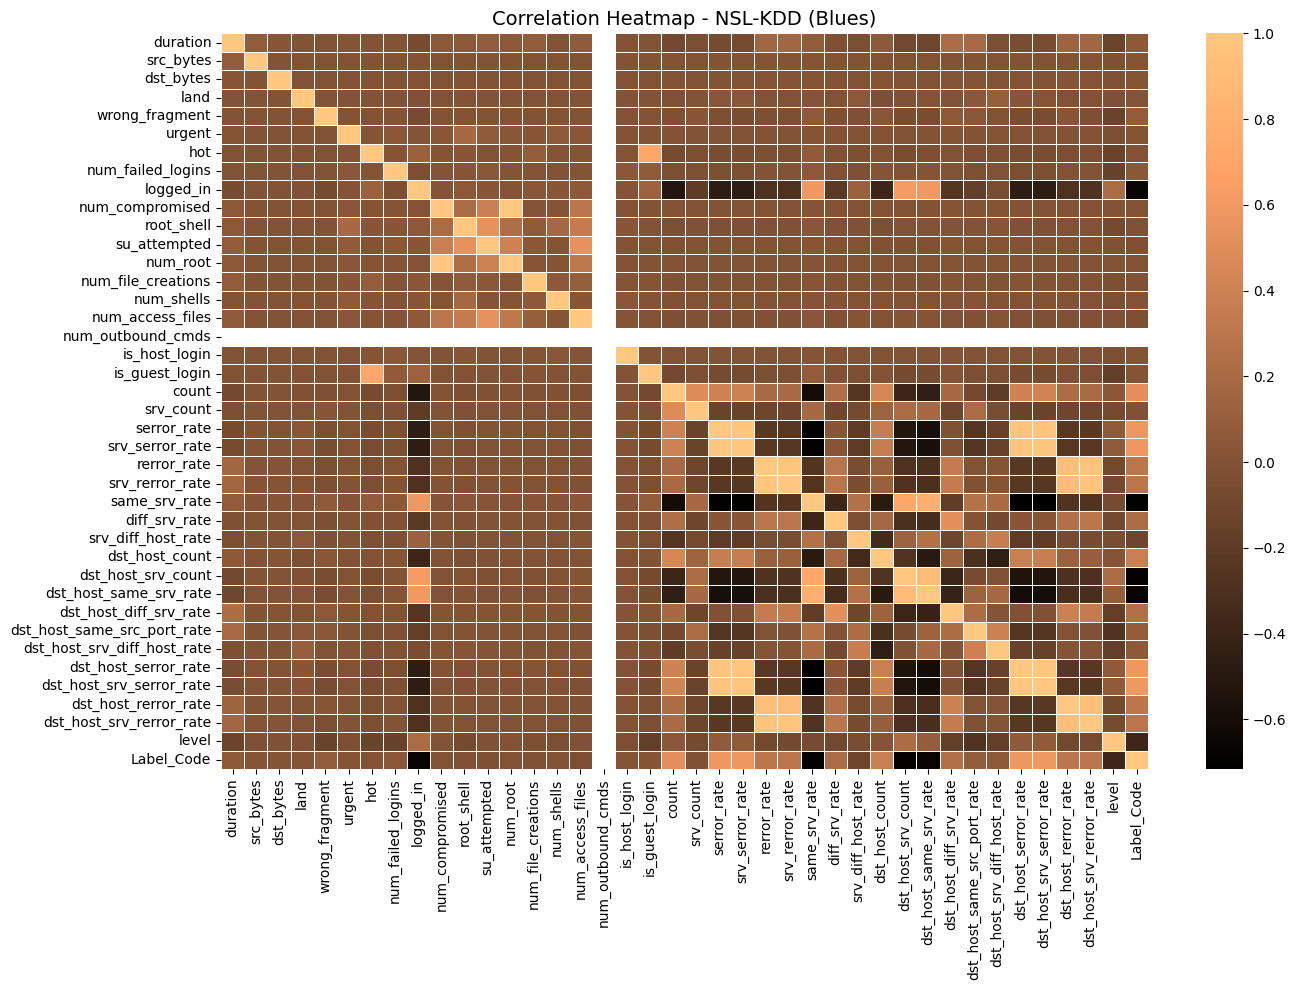

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop non-numeric features
df_numeric = df_final_nsl_kdd.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = df_numeric.corr()

# Plot using navy-blue theme
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, cmap='copper', annot=False, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap - NSL-KDD (Blues)", fontsize=14)
plt.tight_layout()
plt.show()



**Machine learning model Pipeline**

SVM Model

In [ ]:
df = df_final_nsl_kdd.copy()

scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
# Drop irrelevant columns if present
df = df.drop(columns=['label', 'attack', 'level'], errors='ignore')

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=['protocol_type', 'service', 'flag'], drop_first=True)


# Split features and target
X = df_encoded.drop(columns=['Label_Code']).values
y = df_encoded['Label_Code'].values

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Train-test split (on X_scaled, not expanded)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# Initialize SVM (RBF kernel by default)
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', class_weight='balanced', probability=True, random_state=42)




In [ ]:
# Fit model
svm_model.fit(X_train, y_train)

SVC(class_weight='balanced', probability=True, random_state=42)

In [ ]:
# Predict
y_pred_svm = svm_model.predict(X_test)
y_pred_prob_svm = svm_model.predict_proba(X_test)[:, 1]


evaluation


Classification Report (SVM - NSL-KDD):
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     15411
           1       0.99      0.98      0.98     15411

    accuracy                           0.98     30822
   macro avg       0.98      0.98      0.98     30822
weighted avg       0.98      0.98      0.98     30822



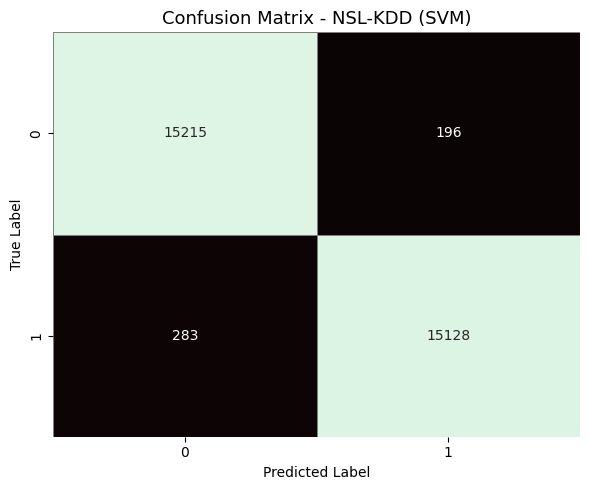

In [ ]:
# Evaluation
print("\nClassification Report (SVM - NSL-KDD):")
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='mako', cbar=False, linewidths=0.5, linecolor='gray')
plt.title("Confusion Matrix - NSL-KDD (SVM)", fontsize=13)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()



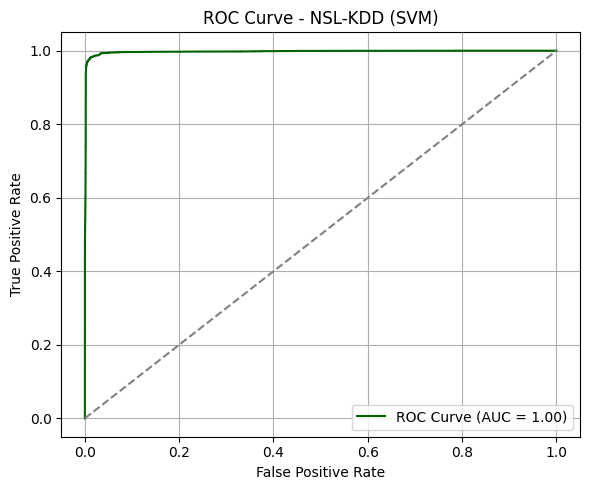

In [ ]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_svm)
auc_score = roc_auc_score(y_test, y_pred_prob_svm)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkgreen', label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - NSL-KDD (SVM)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

**Precesion Recall curve**

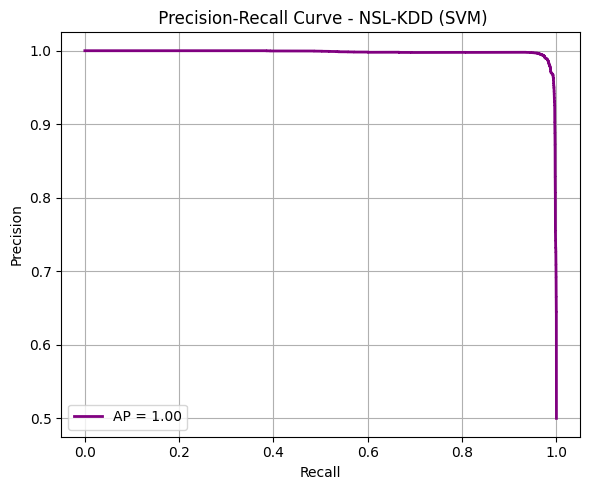

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_pred_prob_svm)
avg_precision = average_precision_score(y_test, y_pred_prob_svm)

plt.figure(figsize=(6, 5))
plt.plot(recall, precision, lw=2, color='purple', label=f"AP = {avg_precision:.2f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(" Precision-Recall Curve - NSL-KDD (SVM)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**Deployment**

In [ ]:
import joblib
import json
import os

domain = 'nsl_kdd'
os.makedirs(f'models/{domain}', exist_ok=True)

# Save model and scaler
joblib.dump(svm_model, f'models/{domain}/model.pkl')
joblib.dump(scaler, f'models/{domain}/scaler.pkl')

# Optional: Save metadata
metadata = {
    'model_type': 'SVM',
    'features': list(df_encoded.drop(columns=['Label_Code']).columns),
    'input_shape': list(X_scaled.shape[1:]),
    'domain': domain
}
with open(f'models/{domain}/metadata.json', 'w') as f:
    json.dump(metadata, f, indent=2)


In [ ]:
with open("models/nsl_kdd/metadata.json") as f:
    print(", ".join(json.load(f)["features"]))


duration, src_bytes, dst_bytes, land, wrong_fragment, urgent, hot, num_failed_logins, logged_in, num_compromised, root_shell, su_attempted, num_root, num_file_creations, num_shells, num_access_files, num_outbound_cmds, is_host_login, is_guest_login, count, srv_count, serror_rate, srv_serror_rate, rerror_rate, srv_rerror_rate, same_srv_rate, diff_srv_rate, srv_diff_host_rate, dst_host_count, dst_host_srv_count, dst_host_same_srv_rate, dst_host_diff_srv_rate, dst_host_same_src_port_rate, dst_host_srv_diff_host_rate, dst_host_serror_rate, dst_host_srv_serror_rate, dst_host_rerror_rate, dst_host_srv_rerror_rate, protocol_type_tcp, protocol_type_udp, service_X11, service_Z39_50, service_aol, service_auth, service_bgp, service_courier, service_csnet_ns, service_ctf, service_daytime, service_discard, service_domain, service_domain_u, service_echo, service_eco_i, service_ecr_i, service_efs, service_exec, service_finger, service_ftp, service_ftp_data, service_gopher, service_harvest, service_ho

0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29,29,1.00,1.00,0.00,0.00,0.00,1.00,0.00,255,255,1.00,0.00,0.04,0.00,0.00,1.00,1.00,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


0, 181, 5450, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 511, 511, 0.00, 0.00, 0.00, 0.00, 1.00, 0.00, 0.00, 255, 255, 1.00, 0.00, 0.05, 0.00, 0.00, 0.00, 0.00, 0.00, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0


# IOT_Intrusion dataset

The iot_intrusion dataset is a **new generation, comprehensive cybersecurity dataset** for evaluating **AI-based intrusion detection** in **IoT and IIoT environments.**

It's created from **diverse, heterogeneous data sources** (IoT/IIoT telemetry, OS logs, network traffic) collected from a **realistic, large-scale testbed**.

We chose it for our robust intrusion detection deep learning model because its **heterogeneous, realistic, and large-scale nature with diverse attack types** provides an ideal foundation for training models that can generalize well and detect a wide range of threats in complex IoT/IIoT systems.

Additionally , The dataset contains 1,191,264 IoT network instances with 47 features, covering various intrusion types such as **DDoS, DoS, Brute Force, Spoofing, Recon, Web-based attacks, and Mirai**.

It includes several subcategories under each attack type, making it well-suited for building predictive models and developing effective Intrusion Detection Systems (IDS) for IoT environments.

In [ ]:
#!pip install kaggle

Mounting Google drive to store kaggle API

In [ ]:
#/content/drive/MyDrive/kaggle.json

In [ ]:
#!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/

In [ ]:
#!kaggle datasets download -d subhajournal/iotintrusion


Dataset URL: https://www.kaggle.com/datasets/subhajournal/iotintrusion
License(s): GNU Lesser General Public License 3.0
  0% 0.00/45.1M [00:00<?, ?B/s]
100% 45.1M/45.1M [00:00<00:00, 524MB/s]


In [ ]:
#!unzip -q iotintrusion.zip -d iotintrusion

replace iotintrusion/IoT_Intrusion.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y


In [ ]:
import os
import shutil


# Define source and destination paths
source_path = "/content/iotintrusion/IoT_Intrusion.csv"
destination_folder = "/content/drive/MyDrive/Datasets/IoT"
destination_path = os.path.join(destination_folder, "IoT_Intrusion.csv")

# Create destination folder if it doesn't exist
os.makedirs(destination_folder, exist_ok=True)

# Copy the dataset to Google Drive
shutil.copy(source_path, destination_path)

print("✅ Dataset copied to:", destination_path)



✅ Dataset copied to: /content/drive/MyDrive/Datasets/IoT/IoT_Intrusion.csv


In [ ]:
import pandas as pd
df_iot_intrusion = pd.read_csv('/content/drive/MyDrive/Datasets/IoT/IoT_Intrusion.csv')
df_iot_intrusion.head()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,54.00,6.00,64.00,0.329807,0.329807,0.0,1,0,1,...,0.000000,54.00,83343831.92,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-RSTFINFlood
1,0.000000,57.04,6.33,64.00,4.290556,4.290556,0.0,0,0,0,...,2.822973,57.04,82926067.47,9.5,10.464666,4.010353,160.987842,0.05,141.55,DoS-TCP_Flood
2,0.000000,0.00,1.00,64.00,33.396799,33.396799,0.0,0,0,0,...,0.000000,42.00,83127993.93,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
3,0.328175,76175.00,17.00,64.00,4642.133010,4642.133010,0.0,0,0,0,...,0.000000,50.00,83015696.38,9.5,10.000000,0.000000,0.000000,0.00,141.55,DoS-UDP_Flood
4,0.117320,101.73,6.11,65.91,6.202211,6.202211,0.0,0,1,0,...,23.113111,57.88,82972999.18,9.5,11.346876,32.716243,3016.808286,0.19,141.55,DoS-SYN_Flood


## Data cleaning

In [ ]:
df_iot_intrusion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 47 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   flow_duration    1048575 non-null  float64
 1   Header_Length    1048575 non-null  float64
 2   Protocol Type    1048575 non-null  float64
 3   Duration         1048575 non-null  float64
 4   Rate             1048575 non-null  float64
 5   Srate            1048575 non-null  float64
 6   Drate            1048575 non-null  float64
 7   fin_flag_number  1048575 non-null  int64  
 8   syn_flag_number  1048575 non-null  int64  
 9   rst_flag_number  1048575 non-null  int64  
 10  psh_flag_number  1048575 non-null  int64  
 11  ack_flag_number  1048575 non-null  int64  
 12  ece_flag_number  1048575 non-null  int64  
 13  cwr_flag_number  1048575 non-null  int64  
 14  ack_count        1048575 non-null  float64
 15  syn_count        1048575 non-null  float64
 16  fin_count        1

NULL VALUES

In [ ]:
df_iot_intrusion.isnull().sum()
# there was no null values found in our dataset , therefore we could proceed with label encoding

,0
flow_duration,0
Header_Length,0
Protocol Type,0
Duration,0
Rate,0
Srate,0
Drate,0
fin_flag_number,0
syn_flag_number,0
rst_flag_number,0


checking the shape

In [ ]:
df_iot_intrusion.shape

(1048575, 47)

**Renaming label to normal versus the other types of attacks**

In [ ]:
# Replace 'BenignTraffic' with 'Normal' in the original dataset
df_iot_intrusion['label'] = df_iot_intrusion['label'].replace('BenignTraffic', 'Normal')

In [ ]:
df_iot_intrusion['label'].value_counts()

,count
label,
DDoS-ICMP_Flood,161281
DDoS-UDP_Flood,121205
DDoS-TCP_Flood,101293
DDoS-PSHACK_Flood,92395
DDoS-SYN_Flood,91644
DDoS-RSTFINFlood,90823
DDoS-SynonymousIP_Flood,80680
DoS-UDP_Flood,74787
DoS-TCP_Flood,59807


The normal label should be upsampled atleast to match with the highest value of attack.

**label distribution**

we need to unify all the attacks types into onse single set which is simply attack .

**unify all attack types into a single label**

In [ ]:
from sklearn.utils import resample

# Separate majority (attacks) and minority (normal) classes
df_normal = df_iot_intrusion[df_iot_intrusion['label'] == 'Normal']
df_attacks = df_iot_intrusion[df_iot_intrusion['label'] != 'Normal']

# Upsample 'Normal' to match the largest attack class
max_attack_size = df_attacks['label'].value_counts().max()

df_normal_upsampled = resample(
    df_normal,
    replace=True,
    n_samples=max_attack_size,
    random_state=42
)

# Combine back and overwrite original DataFrame
df_iot_intrusion = pd.concat([df_attacks, df_normal_upsampled])

# Shuffle the dataset
df_iot_intrusion = df_iot_intrusion.sample(frac=1, random_state=42).reset_index(drop=True)


In [ ]:
# Convert all non-Normal labels to 'Attack'
df_iot_intrusion['label'] = df_iot_intrusion['label'].apply(lambda x: 'Normal' if x == 'Normal' else 'Attack')

In [ ]:
# Confirm the transformation
df_iot_intrusion['label'].value_counts()

,count
label,
Attack,1024099
Normal,161281


In [ ]:
from sklearn.utils import resample

# Separate classes
df_normal = df_iot_intrusion[df_iot_intrusion['label'] == 'Normal']
df_attack = df_iot_intrusion[df_iot_intrusion['label'] == 'Attack']

# Upsample Normal to match Attack
df_normal_upsampled = resample(
    df_normal,
    replace=True,
    n_samples=len(df_attack),  # match Attack count
    random_state=42
)

# Combine and shuffle
df_iot_intrusion = pd.concat([df_attack, df_normal_upsampled])
df_iot_intrusion = df_iot_intrusion.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
# Check new counts
df_iot_intrusion['label'].value_counts()

,count
label,
Normal,1024099
Attack,1024099


label
Normal    1024099
Attack    1024099
Name: count, dtype: int64


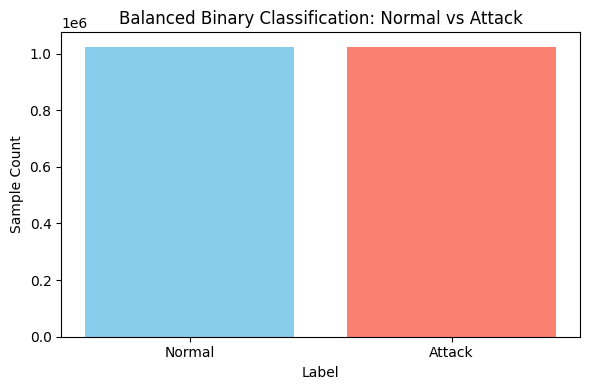

In [ ]:
import matplotlib.pyplot as plt

# Display value counts
label_counts = df_iot_intrusion['label'].value_counts()
print(label_counts)

# Plot the distribution
colors = ['skyblue' if label == 'Normal' else 'salmon' for label in label_counts.index]

plt.figure(figsize=(6, 4))
plt.bar(label_counts.index, label_counts.values, color=colors)
plt.title('Balanced Binary Classification: Normal vs Attack')
plt.xlabel('Label')
plt.ylabel('Sample Count')
plt.xticks(rotation=0)
plt.grid(False)
plt.tight_layout()
plt.show()


DOne , this  is very crucial step for the final merging of all datasets.

In [ ]:
#saving into drive
# Same destination folder as the main dataset
destination_folder = "/content/drive/MyDrive/Datasets/IoT"
os.makedirs(destination_folder, exist_ok=True)

# Save the final dataset CSV in the same folder
final_csv_path = os.path.join(destination_folder, 'df_iot_intrusion_final_dataset.csv')
df_iot_intrusion.to_csv(final_csv_path, index=False)

print(f"✅ Final dataset saved to: {final_csv_path}")


✅ Final dataset saved to: /content/drive/MyDrive/Datasets/IoT/df_iot_intrusion_final_dataset.csv


**MODEL FITTING**

In [ ]:
df_final_iot_intrusion = pd.read_csv("/content/drive/MyDrive/Datasets/IoT/df_iot_intrusion_final_dataset.csv")

In [ ]:
df_final_iot_intrusion.head()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,13.984027,23657.5,8.1,93.2,22.947899,22.947899,0.0,0,0,0,...,41.035704,108.4,1.181450e-02,5.5,14.619359,58.033249,2199.763742,0.9,38.50,Normal
1,0.156985,16893.0,17.0,64.0,2844.658537,2844.658537,0.0,0,0,0,...,0.000000,50.0,8.310223e+07,9.5,10.000000,0.000000,0.000000,0.0,141.55,Attack
2,67.725755,30687.6,8.1,86.7,2.441649,2.441649,0.0,0,0,0,...,84.224871,132.6,1.665239e+08,13.5,17.359769,119.099795,7096.509604,1.0,244.60,Normal
3,10.489853,1129859.2,6.0,97.6,96.331134,96.331134,0.0,0,0,0,...,735.064996,1369.2,1.665240e+08,13.5,36.452371,1041.114208,549288.439100,1.0,244.60,Normal
4,8.844822,642687.0,6.0,215.2,71.058464,71.058464,0.0,0,0,0,...,502.747181,210.8,1.127696e-03,5.5,29.604238,710.991882,289177.525300,0.9,38.50,Normal


In [ ]:
df_final_iot_intrusion['label'].value_counts()

,count
label,
Normal,1024099
Attack,1024099


**Model Pipeline**

Epoch 1/15
10241/10241 ━━━━━━━━━━━━━━━━━━━━ 84s 8ms/step - accuracy: 0.9896 - loss: 0.0451 - val_accuracy: 0.9939 - val_loss: 0.0259
Epoch 2/15
10241/10241 ━━━━━━━━━━━━━━━━━━━━ 110s 11ms/step - accuracy: 0.9943 - loss: 0.0251 - val_accuracy: 0.9942 - val_loss: 0.0250
Epoch 3/15
10241/10241 ━━━━━━━━━━━━━━━━━━━━ 96s 9ms/step - accuracy: 0.9945 - loss: 0.0238 - val_accuracy: 0.9944 - val_loss: 0.0242
Epoch 4/15
10241/10241 ━━━━━━━━━━━━━━━━━━━━ 119s 7ms/step - accuracy: 0.9947 - loss: 0.0233 - val_accuracy: 0.9945 - val_loss: 0.0243
Epoch 5/15
10241/10241 ━━━━━━━━━━━━━━━━━━━━ 78s 8ms/step - accuracy: 0.9948 - loss: 0.0227 - val_accuracy: 0.9946 - val_loss: 0.0237
Epoch 6/15
10241/10241 ━━━━━━━━━━━━━━━━━━━━ 78s 7ms/step - accuracy: 0.9948 - loss: 0.0225 - val_accuracy: 0.9947 - val_loss: 0.0235
Epoch 7/15
10241/10241 ━━━━━━━━━━━━━━━━━━━━ 81s 7ms/step - accuracy: 0.9950 - loss: 0.0222 - val_accuracy: 0.9948 - val_loss: 0.0231
Epoch 8/15
10241/10241 ━━━━━━━━━━━━━━━━━━━━ 85s 7ms/step - accurac

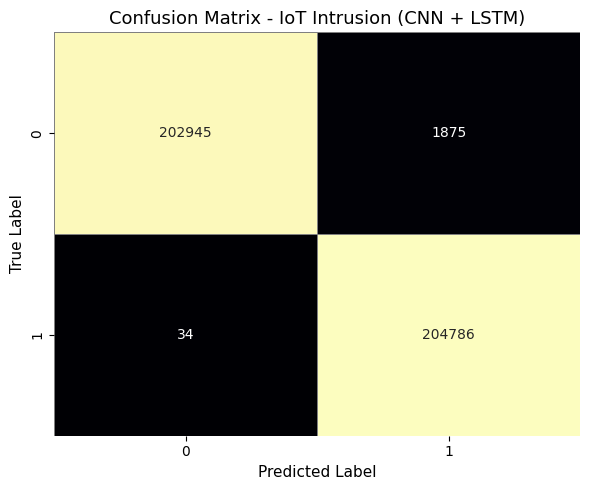

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras import layers, models, callbacks, optimizers
from tensorflow.keras.utils import set_random_seed

# Seed for reproducibility
set_random_seed(42)

# Load and copy data
df = df_final_iot_intrusion.copy()

# Label encode the target
le = LabelEncoder()
df['Label_Code'] = le.fit_transform(df['label'])  # Normal = 0, Attack = 1

# Drop original label column
df.drop(columns=['label'], inplace=True)

# Separate features and target
X = df.drop(columns=['Label_Code']).values
y = df['Label_Code'].values

# Standard scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape for CNN+LSTM
X_dl = np.expand_dims(X_scaled, axis=1)

# Train-test split
X_train_dl, X_test_dl, y_train, y_test = train_test_split(
    X_dl, y, test_size=0.2, stratify=y, random_state=42
)

# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))

# Define CNN + LSTM model
def build_final_cnn_lstm(input_shape):
    model = models.Sequential([
        layers.Conv1D(32, kernel_size=1, activation='relu', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.Dropout(0.1),
        layers.LSTM(64, return_sequences=False),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.4),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(
        optimizer=optimizers.Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

# Build and train model
final_model = build_final_cnn_lstm(input_shape=X_train_dl.shape[1:])
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = final_model.fit(
    X_train_dl, y_train,
    epochs=15,
    batch_size=128,
    validation_split=0.2,
    class_weight=class_weight_dict,
    callbacks=[early_stop],
    verbose=1
)

# Evaluate
y_pred = (final_model.predict(X_test_dl) > 0.5).astype("int32")

print("\nClassification Report (IoT Intrusion):")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='magma', cbar=False, linewidths=0.5, linecolor='gray')
plt.title("Confusion Matrix - IoT Intrusion (CNN + LSTM)", fontsize=13)
plt.xlabel("Predicted Label", fontsize=11)
plt.ylabel("True Label", fontsize=11)
plt.tight_layout()
plt.show()


**Machine Learning model**

In [ ]:
!pip install lightgbm


In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Encode labels

df_iot = df_final_iot_intrusion.copy()
label_encoder = LabelEncoder()
df_iot['label_encoded'] = label_encoder.fit_transform(df_iot['label'])

# Features and target
X = df_iot.drop(columns=['label', 'label_encoded'])
y = df_iot['label_encoded']
num_classes = len(label_encoder.classes_)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from lightgbm import LGBMClassifier


light_model = LGBMClassifier(
    objective='multiclass',
    num_class=num_classes,
    n_estimators=50,
    max_depth=3,
    learning_rate=0.1,
    min_child_samples=20,
    verbose=-1,
    random_state=42
)

light_model.fit(X_train_scaled, y_train)




/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


LGBMClassifier(max_depth=3, n_estimators=50, num_class=2,
               objective='multiclass', random_state=42, verbose=-1)

In [ ]:
# Predict
y_pred = model.predict(X_test_scaled)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



Classification Report (LightGBM - IoT Intrusion):
              precision    recall  f1-score   support

      Attack       1.00      1.00      1.00    204820
      Normal       1.00      1.00      1.00    204820

    accuracy                           1.00    409640
   macro avg       1.00      1.00      1.00    409640
weighted avg       1.00      1.00      1.00    409640



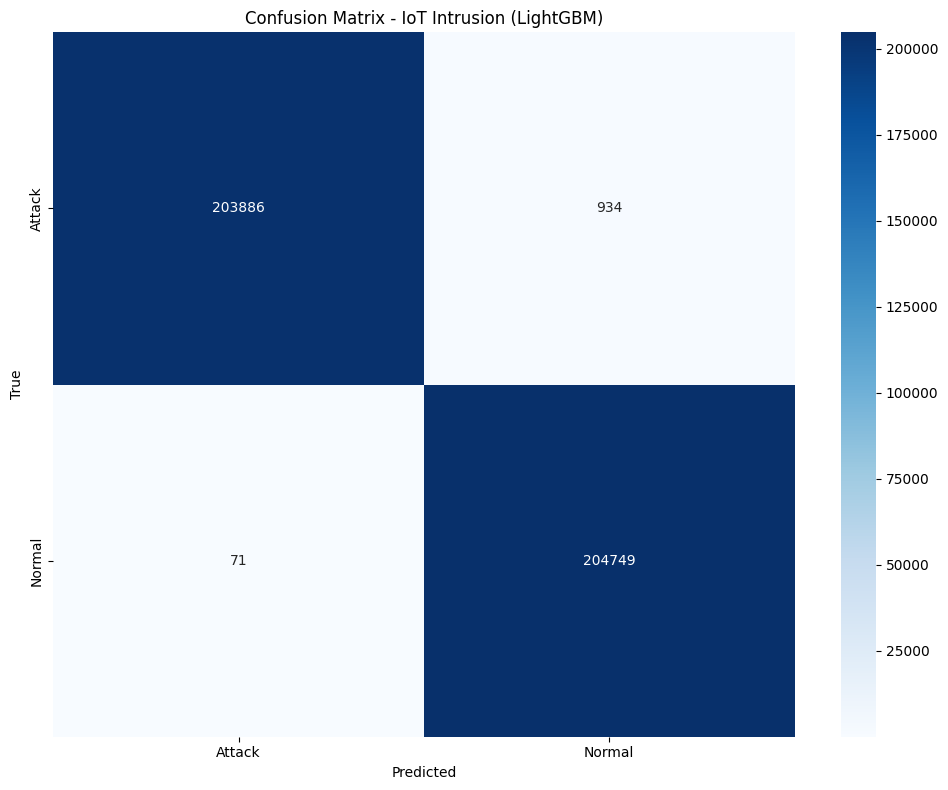

In [ ]:
# Evaluate
print("\nClassification Report (LightGBM - IoT Intrusion):")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix - IoT Intrusion (LightGBM)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

Logistic regression

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(



Classification Report (Logistic Regression - IoT Intrusion):
              precision    recall  f1-score   support

      Attack       0.99      0.98      0.99    204820
      Normal       0.98      0.99      0.99    204820

    accuracy                           0.99    409640
   macro avg       0.99      0.99      0.99    409640
weighted avg       0.99      0.99      0.99    409640



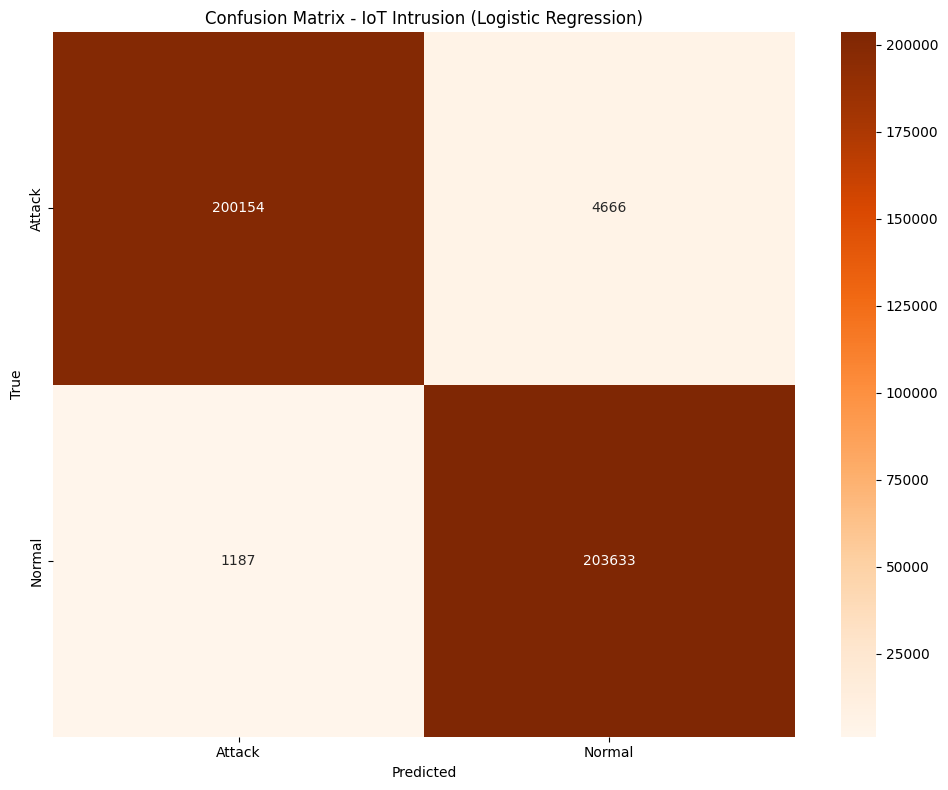

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Train logistic regression (One-vs-Rest strategy)
log_model = LogisticRegression(
    multi_class='ovr',
    solver='lbfgs',
    max_iter=500,
    class_weight='balanced',
    random_state=42
)

log_model.fit(X_train_scaled, y_train)

# Predict
y_pred_log = log_model.predict(X_test_scaled)

# Evaluate
print("\nClassification Report (Logistic Regression - IoT Intrusion):")
print(classification_report(y_test, y_pred_log, target_names=label_encoder.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix - IoT Intrusion (Logistic Regression)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()


deployment


**Logistic regression Model**

In [ ]:
import joblib
import os
import json

domain = 'iot_logistic'

# Create folder
os.makedirs(f'models/{domain}', exist_ok=True)

# Save model, scaler, and label encoder
joblib.dump(log_model, f'models/{domain}/model.pkl')
joblib.dump(scaler, f'models/{domain}/scaler.pkl')
joblib.dump(label_encoder, f'models/{domain}/label_encoder.pkl')

# Save metadata
metadata = {
    'model_type': 'LogisticRegression',
    'classes': label_encoder.classes_.tolist(),
    'features': X.columns.tolist()
}
with open(f'models/{domain}/metadata.json', 'w') as f:
    json.dump(metadata, f, indent=2)


Features

In [ ]:
with open("models/iot_logistic/metadata.json") as f:
    print(", ".join(json.load(f)["features"]))


flow_duration, Header_Length, Protocol Type, Duration, Rate, Srate, Drate, fin_flag_number, syn_flag_number, rst_flag_number, psh_flag_number, ack_flag_number, ece_flag_number, cwr_flag_number, ack_count, syn_count, fin_count, urg_count, rst_count, HTTP, HTTPS, DNS, Telnet, SMTP, SSH, IRC, TCP, UDP, DHCP, ARP, ICMP, IPv, LLC, Tot sum, Min, Max, AVG, Std, Tot size, IAT, Number, Magnitue, Radius, Covariance, Variance, Weight


flow_duration, Header_Length, Protocol Type, Duration, Rate, Srate, Drate, fin_flag_number, syn_flag_number, rst_flag_number, psh_flag_number, ack_flag_number, ece_flag_number, cwr_flag_number, ack_count, syn_count, fin_count, urg_count, rst_count, HTTP, HTTPS, DNS, Telnet, SMTP, SSH, IRC, TCP, UDP, DHCP, ARP, ICMP, IPv, LLC, Tot sum, Min, Max, AVG, Std, Tot size, IAT, Number, Magnitue, Radius, Covariance, Variance, Weight

#CAN-INtrusion Dataset

In [ ]:
#This is a required library to load dataset from dropbox
#!pip install -q gdown

In [ ]:
# Install required library

# Dropbox direct download
'''dropbox_url = "https://www.dropbox.com/scl/fo/8kll7yvbgogkp0vahowvm/ADhDIC8LRFL8wHUexib3C3w?rlkey=43n570cnodtq6yls139r4yvn7&dl=1"
!gdown --fuzzy "{dropbox_url}" -O dropbox_dataset.zip

# Unzip
import zipfile
with zipfile.ZipFile("dropbox_dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("dropbox_dataset") '''


Downloading...
From: https://www.dropbox.com/scl/fo/8kll7yvbgogkp0vahowvm/ADhDIC8LRFL8wHUexib3C3w?rlkey=43n570cnodtq6yls139r4yvn7&dl=1
To: /content/dropbox_dataset.zip
100% 408M/408M [00:17<00:00, 23.9MB/s]


In [ ]:
'''zip_path = "/content/dropbox_dataset.zip"
extract_to = "/content/dropbox_dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)


In [ ]:
import os
import shutil
import zipfile
from google.colab import drive


# Paths
zip_path = "/content/dropbox_dataset.zip"
extract_to = "/content/dropbox_dataset"
drive_folder = "/content/drive/MyDrive/Datasets/dropbox_dataset"

# Extract ZIP file to temporary folder
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

# Create destination folder in Drive
os.makedirs(drive_folder, exist_ok=True)

#Copy extracted contents to Drive (only the files/folders inside)
for item in os.listdir(extract_to):
    src = os.path.join(extract_to, item)
    dst = os.path.join(drive_folder, item)
    if os.path.isdir(src):
        shutil.copytree(src, dst, dirs_exist_ok=True)
    else:
        shutil.copy2(src, dst)

print(f"✅ Extracted contents saved to: {drive_folder}")


✅ Extracted contents saved to: /content/drive/MyDrive/Datasets/dropbox_dataset


In [ ]:
import os

# List contents inside the extracted folder
folder_path = "/content/drive/MyDrive/Datasets/dropbox_dataset"
files = os.listdir(folder_path)
print(files)


['Fuzzy_attack_dataset.txt', 'DoS_attack_dataset.txt', 'Attack_free_dataset.txt', 'Impersonation_attack_dataset.txt']


### THE CAN-Intrussion Dataset is divided into 4 sub-datasets

1. ## Attack_free_dataset.txt
This is your baseline or normal behavior data, which is crucial for training machine learning models to distinguish between benign and malicious activity.
2. ## DoS_attack_dataset.txt
DoS is one of the most common real-world attacks in vehicular networks, where the attacker floods the bus with high-priority frames, blocking legitimate messages.
3. ## Fuzzy_attack_dataset.txt
This simulates random or malformed data being injected.Unpredictable payloads can help test the resilience of intrusion detection models.
4.## Impersonation_attack_dataset.txt
This is a targeted attack mimicking a trusted device. It represents a realistic and stealthy threat in connected vehicles.


In [ ]:
# Define file paths
attack_free_path = "/content/drive/MyDrive/Datasets/dropbox_dataset/Attack_free_dataset.txt"
dos_attack_path = "/content/drive/MyDrive/Datasets/dropbox_dataset/DoS_attack_dataset.txt"
fuzzy_attack_path = "/content/drive/MyDrive/Datasets/dropbox_dataset/Fuzzy_attack_dataset.txt"
impersonation_attack_path = "/content/drive/MyDrive/Datasets/dropbox_dataset/Impersonation_attack_dataset.txt"

In [ ]:

df_attack_free_dataset = pd.read_csv(attack_free_path).sample(n=60000, random_state=42)
df_dos_attack_dataset = pd.read_csv(dos_attack_path).sample(n=60000, random_state=42)
df_fuzzy_attack_dataset = pd.read_csv(fuzzy_attack_path).sample(n=60000, random_state=42)
df_impersonation_attack_dataset = pd.read_csv(impersonation_attack_path).sample(n=60000, random_state=42)

In [ ]:
df_attack_free_dataset.shape

(60000, 1)

In [ ]:
df_dos_attack_dataset.shape

(60000, 1)

In [ ]:
df_fuzzy_attack_dataset.shape

(60000, 1)

In [ ]:
df_impersonation_attack_dataset.shape

(60000, 1)

**Attack free dataset**

In [ ]:
# Display preview
print("Attack-Free Dataset")
df_attack_free_dataset.head()

Attack-Free Dataset


,Timestamp: 0.000000 ID: 0316 000 DLC: 8 05 20 ea 0a 20 1a 00 7f
569521,Timestamp: 249.393462 ID: 0316 ...
990693,Timestamp: 433.814381 ID: 04b0 ...
919811,Timestamp: 402.776258 ID: 02c0 ...
267139,Timestamp: 116.985115 ID: 0153 ...
1041423,Timestamp: 456.031629 ID: 0080 ...


**Dealing with unstructured Data**

In [ ]:
import pandas as pd

# SGeting the name of the only column
raw_column = df_attack_free_dataset.columns[0]

# Using regex to extract fields
df_parsed = df_attack_free_dataset[raw_column].str.extract(
    r'Timestamp:\s*([\d.]+)\s+ID:\s*([0-9A-Fa-f]+)\s+(\d{3})\s+DLC:\s*(\d+)\s+((?:[0-9A-Fa-f]{2}\s*){1,8})'
)

# Renaming
df_parsed.columns = ['timestamp', 'id', 'unknown_field', 'dlc', 'data']

# Drop any rows that didn't match the pattern
df_parsed.dropna(inplace=True)

# Split 'data' column into byte fields
data_bytes = df_parsed['data'].str.strip().str.split(' ', expand=True)
data_bytes.columns = [f'b{i}' for i in range(data_bytes.shape[1])]

# Convert hex strings to integers, handle non-string cases
for col in data_bytes.columns:
    data_bytes[col] = data_bytes[col].apply(
        lambda x: int(str(x), 16) if pd.notnull(x) and str(x).strip() != '' else 0
    )


# Merge with original parsed data
df_attack_free_parsed = pd.concat([df_parsed.drop(columns=['data']), data_bytes], axis=1)

# Convert other columns to appropriate types
df_attack_free_parsed['timestamp'] = df_attack_free_parsed['timestamp'].astype(float)
df_attack_free_parsed['dlc'] = df_attack_free_parsed['dlc'].astype(int)
df_attack_free_parsed['unknown_field'] = df_attack_free_parsed['unknown_field'].astype(str)

In [ ]:
# Preview the result
df_attack_free_parsed.head()

,timestamp,id,unknown_field,dlc,b0,b1,b2,b3,b4,b5,b6,b7
569521,249.393462,0316,000,8,5,30,216,9,31,23,0,127
990693,433.814381,04b0,000,8,0,0,0,0,0,0,0,0
267139,116.985115,0153,000,8,0,128,16,255,0,255,144,30
1041423,456.031629,0080,000,8,0,23,184,9,24,23,24,198
2090947,915.651082,05a0,000,8,0,0,0,0,0,0,0,0


**Renaming columns correctly**

In [ ]:
# Defining the desired new column names
can_columns = [
    'Timestamp', 'CAN_ID', 'DLC', 'DATA0', 'DATA1', 'DATA2', 'DATA3',
    'DATA4', 'DATA5', 'DATA6', 'DATA7'
]

# Droping the 'unknown_field'
df_attack_free_parsed = df_attack_free_parsed.drop(columns=['unknown_field'])

# Renaming the remaining columns to match the CAN dataset format
df_attack_free_parsed.columns = can_columns


In [ ]:
df_attack_free_parsed.head()

,Timestamp,CAN_ID,DLC,DATA0,DATA1,DATA2,DATA3,DATA4,DATA5,DATA6,DATA7
569521,249.393462,0316,8,5,30,216,9,31,23,0,127
990693,433.814381,04b0,8,0,0,0,0,0,0,0,0
267139,116.985115,0153,8,0,128,16,255,0,255,144,30
1041423,456.031629,0080,8,0,23,184,9,24,23,24,198
2090947,915.651082,05a0,8,0,0,0,0,0,0,0,0


**GENERATING LABELS**

since this first dataset is attack free , therefore it means that all the actions are normal so we will directly label it to "0"

In [ ]:
# Label all rows in the attack-free dataset as normal (0)
df_attack_free_parsed['Label'] = 0

#renaming to final dataset
df_attack_free_final = df_attack_free_parsed.copy()

In [ ]:
df_attack_free_final.head()

,Timestamp,CAN_ID,DLC,DATA0,DATA1,DATA2,DATA3,DATA4,DATA5,DATA6,DATA7,Label
569521,249.393462,0316,8,5,30,216,9,31,23,0,127,0
990693,433.814381,04b0,8,0,0,0,0,0,0,0,0,0
267139,116.985115,0153,8,0,128,16,255,0,255,144,30,0
1041423,456.031629,0080,8,0,23,184,9,24,23,24,198,0
2090947,915.651082,05a0,8,0,0,0,0,0,0,0,0,0


**Ensuring correct data types**

In [ ]:
# Ensure Label is integer
df_attack_free_final['Label'] = df_attack_free_final['Label'].astype(int)

# Confirm column names
print(df_attack_free_final.dtypes)
print(df_attack_free_final['Label'].value_counts())


Timestamp    float64
CAN_ID        object
DLC            int64
DATA0          int64
DATA1          int64
DATA2          int64
DATA3          int64
DATA4          int64
DATA5          int64
DATA6          int64
DATA7          int64
Label          int64
dtype: object
Label
0    57523
Name: count, dtype: int64


**Saving final structured and label dataset**

In [ ]:
df_attack_free_final['Label'].value_counts()

,count
Label,
0,57523


In [ ]:
save_path = "/content/drive/MyDrive/Datasets/dropbox_dataset/df_attack_free_final.csv"
df_attack_free_final.to_csv(save_path, index=False)
print(f"Attack free dataset saved to: {save_path}")

Attack free dataset saved to: /content/drive/MyDrive/Datasets/dropbox_dataset/df_attack_free_final.csv


In [ ]:
#from google.colab import files
#files.download('df_attack_free_final.csv')


**Dos Attack**

In [ ]:
# Display preview
print("Dos attack Dataset")
df_dos_attack_dataset.head()

Dos attack Dataset


,Timestamp: 0.000000 ID: 0000 000 DLC: 8 00 00 00 00 00 00 00 00
104901,Timestamp: 54.639745 ID: 0000 ...
527671,Timestamp: 246.799001 ID: 0316 ...
191980,Timestamp: 109.087921 ID: 0153 ...
187067,Timestamp: 105.097623 ID: 0164 ...
418887,Timestamp: 211.021618 ID: 04b1 ...


**Parsing**

In [ ]:
#Get the name of the single column
raw_column1 = df_dos_attack_dataset.columns[0]

# Extract the structured fields using regex
df_parsed_dos_attack = df_dos_attack_dataset[raw_column1].str.extract(
    r'Timestamp:\s*([\d.]+)\s+ID:\s*([0-9A-Fa-f]+)\s+(\d{3})\s+DLC:\s*(\d+)\s+((?:[0-9A-Fa-f]{2}\s*){1,8})'
)

# Rename the columns
df_parsed.columns = ['timestamp', 'id', 'unknown_field', 'dlc', 'data']

# Drop any malformed rows
df_parsed.dropna(inplace=True)

# Split the 'data' column into byte columns
data_bytes = df_parsed['data'].str.strip().str.split(r'\s+', expand=True)
data_bytes.columns = [f'b{i}' for i in range(data_bytes.shape[1])]

# Convert hex strings to integers, handle non-string cases
for col in data_bytes.columns:
    data_bytes[col] = data_bytes[col].apply(
        lambda x: int(str(x), 16) if pd.notnull(x) and str(x).strip() != '' else 0
    )


# Combine everything into a final dataframe
df_parsed_dos_attack = pd.concat([df_parsed.drop(columns=['data']), data_bytes], axis=1)

# Convert types
df_parsed_dos_attack['timestamp'] = df_parsed_dos_attack['timestamp'].astype(float)
df_parsed_dos_attack['dlc'] = df_parsed_dos_attack['dlc'].astype(int)



In [ ]:
df_parsed_dos_attack.head()


,timestamp,id,unknown_field,dlc,b0,b1,b2,b3,b4,b5,b6,b7
569521,249.393462,0316,000,8,5,30,216,9,31,23,0,127
990693,433.814381,04b0,000,8,0,0,0,0,0,0,0,0
267139,116.985115,0153,000,8,0,128,16,255,0,255,144,30
1041423,456.031629,0080,000,8,0,23,184,9,24,23,24,198
2090947,915.651082,05a0,000,8,0,0,0,0,0,0,0,0


**Renaming columns**

In [ ]:
# Defining the desired new column names
can_columns = [
    'Timestamp', 'CAN_ID', 'DLC', 'DATA0', 'DATA1', 'DATA2', 'DATA3',
    'DATA4', 'DATA5', 'DATA6', 'DATA7'
]

# Droping the 'unknown_field'
df_parsed_dos_attack = df_parsed_dos_attack.drop(columns=['unknown_field'])

# Renaming the remaining columns to match the CAN dataset format
df_parsed_dos_attack.columns = can_columns


In [ ]:
df_parsed_dos_attack.head()

,Timestamp,CAN_ID,DLC,DATA0,DATA1,DATA2,DATA3,DATA4,DATA5,DATA6,DATA7
569521,249.393462,0316,8,5,30,216,9,31,23,0,127
990693,433.814381,04b0,8,0,0,0,0,0,0,0,0
267139,116.985115,0153,8,0,128,16,255,0,255,144,30
1041423,456.031629,0080,8,0,23,184,9,24,23,24,198
2090947,915.651082,05a0,8,0,0,0,0,0,0,0,0


**Generating label**

Rule:

0 to 250 seconds → **Normal traffic** (Label = 0)


+250 seconds and beyond → Mixed (**Normal + Attack**), but considered under attack (Label = 1)

In [ ]:
# Label everything
df_parsed_dos_attack['Label'] = df_parsed_dos_attack['Timestamp'].apply(
    lambda x: 0 if x < 250 else 1
)

# Split into two datasets
# This means that we are spliting the raw parsed dataset into two separate datasets where
#one with only label = 0 goes into the df_attack_free_final dataset while
# one with only label =1 goes into the df_dos_final
df_dos_final = df_parsed_dos_attack[df_parsed_dos_attack['Label'] == 1].copy()
df_attack_free_from_dos = df_parsed_dos_attack[df_parsed_dos_attack['Label'] == 0].copy()


In [ ]:
# Save DoS attack dataset
df_dos_final.to_csv("/content/drive/MyDrive/Datasets/dropbox_dataset/df_dos_final.csv", index=False)

# Save extra attack-free data from DoS source
df_attack_free_from_dos.to_csv("/content/drive/MyDrive/Datasets/dropbox_dataset/df_attack_free_from_dos.csv", index=False)


**updating df_attack_free**

In [ ]:
df_attack_free_final = pd.concat([df_attack_free_final, df_attack_free_from_dos], ignore_index=True)


**saving update df_attack_free dataset**

In [ ]:
df_attack_free_final.to_csv("/content/drive/MyDrive/Datasets/dropbox_dataset/df_attack_free_final.csv", index=False)


In [ ]:
df_dos_final.head()

,Timestamp,CAN_ID,DLC,DATA0,DATA1,DATA2,DATA3,DATA4,DATA5,DATA6,DATA7,Label
990693,433.814381,04b0,8,0,0,0,0,0,0,0,0,1
1041423,456.031629,0080,8,0,23,184,9,24,23,24,198,1
2090947,915.651082,05a0,8,0,0,0,0,0,0,0,0,1
998449,437.212002,0260,8,5,24,0,48,255,142,95,7,1
1260207,551.835304,0220,8,238,3,2,4,9,0,58,16,1


**Verify attack labels**

In [ ]:
df_dos_final['Label'].value_counts()

,count
Label,
1,43467


**Verifying datatypes**

In [ ]:
print(df_dos_final.dtypes)


Timestamp    float64
CAN_ID        object
DLC            int64
DATA0          int64
DATA1          int64
DATA2          int64
DATA3          int64
DATA4          int64
DATA5          int64
DATA6          int64
DATA7          int64
Label          int64
dtype: object


**Saving the structured and labelled dataset to csv file**

In [ ]:
save_path = "/content/drive/MyDrive/Datasets/dropbox_dataset/df_dos_final.csv"
df_dos_final.to_csv(save_path, index=False)

print(f"✅ DoS dataset saved with correct datatypes to: {save_path}")


✅ DoS dataset saved with correct datatypes to: /content/drive/MyDrive/Datasets/dropbox_dataset/df_dos_final.csv


In [ ]:
#from google.colab import files
#files.download('df_dos_final.csv')

**Fuzzy Attack**

In [ ]:
# Display preview
print("fuzzy Dataset")
df_attack_free_dataset.head()

fuzzy Dataset


,Timestamp: 0.000000 ID: 0316 000 DLC: 8 05 20 ea 0a 20 1a 00 7f
569521,Timestamp: 249.393462 ID: 0316 ...
990693,Timestamp: 433.814381 ID: 04b0 ...
919811,Timestamp: 402.776258 ID: 02c0 ...
267139,Timestamp: 116.985115 ID: 0153 ...
1041423,Timestamp: 456.031629 ID: 0080 ...


**parsing data**

In [ ]:
# Get the name of the single column
raw_column = df_fuzzy_attack_dataset.columns[0]

# Extract structured fields using regex
df_parsed_fuzzy = df_fuzzy_attack_dataset[raw_column].str.extract(
    r'Timestamp:\s*([\d.]+)\s+ID:\s*([0-9A-Fa-f]+)\s+(\d{3})\s+DLC:\s*(\d+)\s+((?:[0-9A-Fa-f]{2}\s*){1,8})'
)

# Rename the extracted columns
df_parsed.columns = ['timestamp', 'id', 'unknown_field', 'dlc', 'data']

# Drop rows with parsing errors (if any)
df_parsed.dropna(inplace=True)

# Split the 'data' column into individual bytes
data_bytes = df_parsed['data'].str.strip().str.split(r'\s+', expand=True)
data_bytes.columns = [f'b{i}' for i in range(data_bytes.shape[1])]

# Convert hex bytes to integers safely
for col in data_bytes.columns:
    data_bytes[col] = data_bytes[col].apply(lambda x: int(x, 16) if isinstance(x, str) and len(x) == 2 else 0)

# Combine the cleaned structured fields with the byte data
df_parsed_fuzzy = pd.concat([df_parsed.drop(columns=['data']), data_bytes], axis=1)

# Convert data types
df_parsed_fuzzy['timestamp'] = df_parsed_fuzzy['timestamp'].astype(float)
df_parsed_fuzzy['dlc'] = df_parsed_fuzzy['dlc'].astype(int)
df_parsed_fuzzy['unknown_field'] = df_parsed_fuzzy['unknown_field'].astype(str)

In [ ]:
df_parsed_fuzzy.head()

,timestamp,id,unknown_field,dlc,b0,b1,b2,b3,b4,b5,b6,b7
569521,249.393462,0316,000,8,5,30,216,9,31,23,0,127
990693,433.814381,04b0,000,8,0,0,0,0,0,0,0,0
267139,116.985115,0153,000,8,0,128,16,255,0,255,144,30
1041423,456.031629,0080,000,8,0,23,184,9,24,23,24,198
2090947,915.651082,05a0,000,8,0,0,0,0,0,0,0,0


**Renaming columns**

In [ ]:
# Defining the desired new column names
can_columns = [
    'Timestamp', 'CAN_ID', 'DLC', 'DATA0', 'DATA1', 'DATA2', 'DATA3',
    'DATA4', 'DATA5', 'DATA6', 'DATA7'
]

# Droping the 'unknown_field'
df_parsed_fuzzy = df_parsed_fuzzy.drop(columns=['unknown_field'])

# Renaming the remaining columns to match the CAN dataset format
df_parsed_fuzzy.columns = can_columns


In [ ]:
df_parsed_fuzzy.head()

,Timestamp,CAN_ID,DLC,DATA0,DATA1,DATA2,DATA3,DATA4,DATA5,DATA6,DATA7
569521,249.393462,0316,8,5,30,216,9,31,23,0,127
990693,433.814381,04b0,8,0,0,0,0,0,0,0,0
267139,116.985115,0153,8,0,128,16,255,0,255,144,30
1041423,456.031629,0080,8,0,23,184,9,24,23,24,198
2090947,915.651082,05a0,8,0,0,0,0,0,0,0,0


**labeling Data**

Rule:

0 to 250 seconds → **Normal traffic** (Label = 0)


+250 seconds and beyond → Mixed (**Normal + Attack**), but considered under attack (Label = 1)

In [ ]:
# Filter attack rows
df_fuzzy_final = df_fuzzy_final[df_fuzzy_final['Label'] == 1].copy()

# Extract normal rows if you want to merge later
df_attack_free_from_fuzzy = df_fuzzy_final[df_fuzzy_final['Label'] == 0].copy()


In [ ]:
df_fuzzy_final.head()

,Timestamp,CAN_ID,DLC,DATA0,DATA1,DATA2,DATA3,DATA4,DATA5,DATA6,DATA7,Label
990693,433.814381,04b0,8,0,0,0,0,0,0,0,0,1
1041423,456.031629,0080,8,0,23,184,9,24,23,24,198,1
2090947,915.651082,05a0,8,0,0,0,0,0,0,0,0,1
998449,437.212002,0260,8,5,24,0,48,255,142,95,7,1
1260207,551.835304,0220,8,238,3,2,4,9,0,58,16,1


**Verifying labels count**

In [ ]:
df_fuzzy_final['Label'].value_counts()

,count
Label,
1,43467


Verifying Data Types

In [ ]:
print(df_fuzzy_final.dtypes)


Timestamp    float64
CAN_ID        object
DLC            int64
DATA0          int64
DATA1          int64
DATA2          int64
DATA3          int64
DATA4          int64
DATA5          int64
DATA6          int64
DATA7          int64
Label          int64
dtype: object


In [ ]:
df_fuzzy_final.to_csv("/content/drive/MyDrive/Datasets/dropbox_dataset/df_fuzzy_final.csv", index=False)
print("✅ Fuzzy attack dataset saved successfully.")


✅ Fuzzy attack dataset saved successfully.


**Impersonation Attack**

In [ ]:
# Display preview
print("Impersonation Attack")
df_impersonation_attack_dataset.head()

Impersonation Attack


,Timestamp: 1481192898.075465 ID: 0587 000 DLC: 8 00 00 00 00 00 00 00 01
409873,Timestamp: 1481193097.093258 ID: 0220 ...
682124,Timestamp: 1481193230.752005 ID: 0440 ...
703721,Timestamp: 1481193241.113018 ID: 04b1 ...
554697,Timestamp: 1481193166.779062 ID: 0370 ...
30399,Timestamp: 1481192912.488904 ID: 0370 ...


**parsing dataset**

In [ ]:
# Get the raw column name
raw_column = df_impersonation_attack_dataset.columns[0]

# Extract structured components using regex
df_parsed_impersonation = df_impersonation_attack_dataset[raw_column].str.extract(
    r'Timestamp:\s*([\d.]+)\s+ID:\s*([0-9A-Fa-f]+)\s+(\d{3})\s+DLC:\s*(\d+)\s+((?:[0-9A-Fa-f]{2}\s*){1,8})'
)

# Rename columns
df_parsed_impersonation.columns = ['timestamp', 'id', 'unknown_field', 'dlc', 'data']

#Drop rows that didn't match the pattern
df_parsed_impersonation.dropna(inplace=True)

# Split the 'data' into individual bytes
data_bytes = df_parsed_impersonation['data'].str.strip().str.split(r'\s+', expand=True)
data_bytes.columns = [f'b{i}' for i in range(data_bytes.shape[1])]

# Convert hex byte strings to integers
for col in data_bytes.columns:
    data_bytes[col] = data_bytes[col].apply(lambda x: int(x, 16) if isinstance(x, str) and len(x) == 2 else 0)

# Merge structured fields with byte values
df_parsed_impersonation_final = pd.concat([df_parsed_impersonation.drop(columns=['data']), data_bytes], axis=1)

# Convert data types
df_parsed_impersonation_final['timestamp'] = df_parsed_impersonation_final['timestamp'].astype(float)
df_parsed_impersonation_final['dlc'] = df_parsed_impersonation_final['dlc'].astype(int)
df_parsed_impersonation_final['unknown_field'] = df_parsed_impersonation_final['unknown_field'].astype(str)




In [ ]:
df_parsed_impersonation_final.head()

,timestamp,id,unknown_field,dlc,b0,b1,b2,b3,b4,b5,b6,b7
409873,1.481193e+09,0220,000,8,246,3,247,3,9,0,56,16
682124,1.481193e+09,0440,000,8,255,80,0,0,255,248,8,0
703721,1.481193e+09,04b1,000,8,0,1,3,4,0,0,0,8
554697,1.481193e+09,0370,000,8,255,32,0,128,255,0,0,160
30399,1.481193e+09,0370,000,8,255,32,0,128,255,0,0,160


**Renaming Columns**

In [ ]:
# Defining the desired new column names
can_columns = [
    'Timestamp', 'CAN_ID', 'DLC', 'DATA0', 'DATA1', 'DATA2', 'DATA3',
    'DATA4', 'DATA5', 'DATA6', 'DATA7'
]

# Droping the 'unknown_field'
df_parsed_impersonation_final = df_parsed_impersonation_final.drop(columns=['unknown_field'])

# Renaming the remaining columns to match the CAN dataset format
df_parsed_impersonation_final.columns = can_columns


In [ ]:
df_parsed_impersonation_final.head()


,Timestamp,CAN_ID,DLC,DATA0,DATA1,DATA2,DATA3,DATA4,DATA5,DATA6,DATA7
409873,1.481193e+09,0220,8,246,3,247,3,9,0,56,16
682124,1.481193e+09,0440,8,255,80,0,0,255,248,8,0
703721,1.481193e+09,04b1,8,0,1,3,4,0,0,0,8
554697,1.481193e+09,0370,8,255,32,0,128,255,0,0,160
30399,1.481193e+09,0370,8,255,32,0,128,255,0,0,160


**Generating Labels**

In [ ]:
# Apply the label
df_parsed_impersonation_final['Label'] = df_parsed_impersonation_final['Timestamp'].apply(lambda x: 0 if x < 250 else 1)
# impersonation like the name suggest it means that the logic should should all the entries or rather 90% of the entries to be attack

In [ ]:
# Rename the final dataset
df_impersonation_final = df_parsed_impersonation_final.copy()



In [ ]:
df_impersonation_final.head()

,Timestamp,CAN_ID,DLC,DATA0,DATA1,DATA2,DATA3,DATA4,DATA5,DATA6,DATA7,Label
409873,1.481193e+09,0220,8,246,3,247,3,9,0,56,16,1
682124,1.481193e+09,0440,8,255,80,0,0,255,248,8,0,1
703721,1.481193e+09,04b1,8,0,1,3,4,0,0,0,8,1
554697,1.481193e+09,0370,8,255,32,0,128,255,0,0,160,1
30399,1.481193e+09,0370,8,255,32,0,128,255,0,0,160,1


**Verifying label counts**

In [ ]:
df_impersonation_final['Label'].value_counts()
#value count shows that all the dataset was built to give example for attacks only.

,count
Label,
1,60000


In [ ]:
df_impersonation_final.dtypes

,0
Timestamp,float64
CAN_ID,object
DLC,int64
DATA0,int64
DATA1,int64
DATA2,int64
DATA3,int64
DATA4,int64
DATA5,int64
DATA6,int64


**Saving final structered and labelled dataset**

In [ ]:
df_impersonation_final.to_csv("/content/drive/MyDrive/Datasets/dropbox_dataset/df_impersonation_final.csv", index=False)
print("✅ Impersonation dataset saved successfully.")

✅ Impersonation dataset saved successfully.


**Merging final dataset for CAN**

In [ ]:
import pandas as pd

# Load all final labeled datasets
df1 = pd.read_csv("/content/drive/MyDrive/Datasets/dropbox_dataset/df_attack_free_final.csv")
df2 = pd.read_csv("/content/drive/MyDrive/Datasets/dropbox_dataset/df_dos_final.csv")
df3 = pd.read_csv("/content/drive/MyDrive/Datasets/dropbox_dataset/df_fuzzy_final.csv")
df4 = pd.read_csv("/content/drive/MyDrive/Datasets/dropbox_dataset/df_impersonation_final.csv")

In [ ]:
# Combine all into one final dataset
df_CAN_Intrusion_final_dataset = pd.concat([df1, df2, df3, df4], ignore_index=True)

Verifying merged dataset

In [ ]:
# Check label distribution
print("Label distribution:\n", df_CAN_Intrusion_final_dataset['Label'].value_counts())

Label distribution:
 Label
1    146934
0     71579
Name: count, dtype: int64


In [ ]:
# Check shape
print("\nDataset shape:", df_CAN_Intrusion_final_dataset.shape)


Dataset shape: (218513, 12)


In [ ]:
# Confirm datatypes
print("\nColumn types:\n", df_CAN_Intrusion_final_dataset.dtypes)


Column types:
 Timestamp    float64
CAN_ID        object
DLC            int64
DATA0          int64
DATA1          int64
DATA2          int64
DATA3          int64
DATA4          int64
DATA5          int64
DATA6          int64
DATA7          int64
Label          int64
dtype: object


In [ ]:
df_CAN_Intrusion_final_dataset.head()

,Timestamp,CAN_ID,DLC,DATA0,DATA1,DATA2,DATA3,DATA4,DATA5,DATA6,DATA7,Label
0,249.393462,0316,8,5,30,216,9,31,23,0,127,0
1,433.814381,04b0,8,0,0,0,0,0,0,0,0,0
2,116.985115,0153,8,0,128,16,255,0,255,144,30,0
3,456.031629,0080,8,0,23,184,9,24,23,24,198,0
4,915.651082,05a0,8,0,0,0,0,0,0,0,0,0


**Label distribution**

In [ ]:
print(df_CAN_Intrusion_final_dataset['Label'].unique())


[0 1]


In [ ]:
# map numeric labels to string labels for better plotting
df_CAN_Intrusion_final_dataset['Label'] = df_CAN_Intrusion_final_dataset['Label'].map({0: 'Normal', 1: 'Attack'})


Label
Attack    146934
Normal     71579
Name: count, dtype: int64


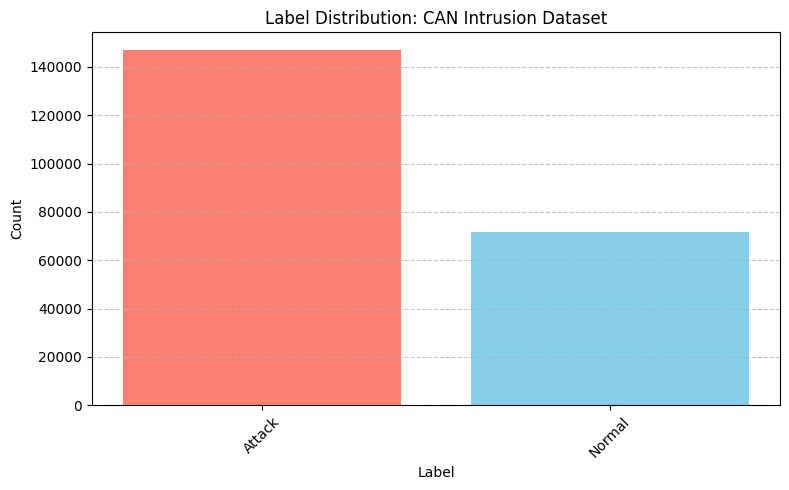

In [ ]:
import matplotlib.pyplot as plt

# Check label distribution
label_counts = df_CAN_Intrusion_final_dataset['Label'].value_counts()
print(label_counts)

# Color: blue for normal, red for attack
colors = ['skyblue' if str(label).lower() == 'normal' else 'salmon' for label in label_counts.index]

# Plot
plt.figure(figsize=(8, 5))
plt.bar(label_counts.index, label_counts.values, color=colors)
plt.title('Label Distribution: CAN Intrusion Dataset')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



Balancing dataset

In [ ]:
label_map = {'Normal': 0, 'Attack': 1}
df_CAN_Intrusion_final_dataset['Label'] = df_CAN_Intrusion_final_dataset['Label'].map(label_map)


In [ ]:
from sklearn.utils import resample

# Split the dataset
df_attack = df_CAN_Intrusion_final_dataset[df_CAN_Intrusion_final_dataset['Label'] == 1]
df_normal = df_CAN_Intrusion_final_dataset[df_CAN_Intrusion_final_dataset['Label'] == 0]

# Undersample attack class
df_attack_downsampled = resample(
    df_attack,
    replace=False,
    n_samples=len(df_normal),
    random_state=42
)

# Combine balanced data
df_CAN_Intrusion_balanced = pd.concat([df_normal, df_attack_downsampled], ignore_index=True)

# Shuffle
df_CAN_Intrusion_balanced = df_CAN_Intrusion_balanced.sample(frac=1, random_state=42).reset_index(drop=True)


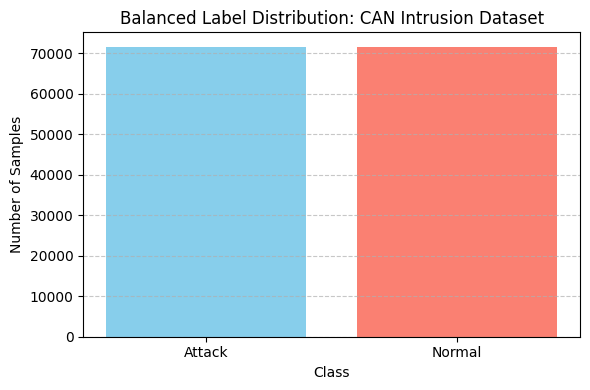

In [ ]:
import matplotlib.pyplot as plt

# Optional: add human-readable labels for plotting
label_map = {0: 'Normal', 1: 'Attack'}
df_CAN_Intrusion_balanced['Label_Name'] = df_CAN_Intrusion_balanced['Label'].map(label_map)

# Count label occurrences
label_counts = df_CAN_Intrusion_balanced['Label_Name'].value_counts()

# Plot
colors = ['skyblue', 'salmon']
plt.figure(figsize=(6, 4))
plt.bar(label_counts.index, label_counts.values, color=colors)
plt.title('Balanced Label Distribution: CAN Intrusion Dataset')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



verifying value counts

In [ ]:
print("📊 Label distribution before saving:")
print(df_CAN_Intrusion_balanced['Label'].value_counts())


📊 Label distribution before saving:
Label
1    71579
0    71579
Name: count, dtype: int64


In [ ]:
# Define save path
save_path = "/content/drive/MyDrive/Datasets/dropbox_dataset/df_CAN_Intrusion_final_dataset.csv"

# Save it
df_CAN_Intrusion_balanced.to_csv(save_path, index=False)

print(f"✅ Balanced CAN Intrusion dataset saved to:\n{save_path}")


✅ Balanced CAN Intrusion dataset saved to:
/content/drive/MyDrive/Datasets/dropbox_dataset/df_CAN_Intrusion_final_dataset.csv


**Model fitting**

In [ ]:
df_final_CAN_intrusion = pd.read_csv("/content/drive/MyDrive/Datasets/dropbox_dataset/df_CAN_Intrusion_final_dataset.csv")

In [ ]:
df_final_CAN_intrusion.head()

,Timestamp,CAN_ID,DLC,DATA0,DATA1,DATA2,DATA3,DATA4,DATA5,DATA6,DATA7,Label,Label_Name
0,283.690309,0260,8,5,30,0,48,255,142,95,1,1,Attack
1,513.653236,0110,8,224,60,48,9,0,0,0,0,0,Normal
2,797.304630,0034,8,0,0,0,0,0,0,0,0,1,Attack
3,109.950755,0080,8,0,23,202,9,32,24,32,102,0,Normal
4,900.899752,0370,8,255,32,0,128,255,0,0,100,0,Normal


**Feature engineering**

In [ ]:
import numpy as np

df = df_final_CAN_intrusion.copy()

# Convert DATA0–7 to numeric (if not already)
for col in [f'DATA{i}' for i in range(8)]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Feature engineering on DATA0–7
data_cols = [f'DATA{i}' for i in range(8)]
df['DATA_mean'] = df[data_cols].mean(axis=1)
df['DATA_std'] = df[data_cols].std(axis=1)
df['DATA_sum'] = df[data_cols].sum(axis=1)
df['DATA_max'] = df[data_cols].max(axis=1)
df['DATA_min'] = df[data_cols].min(axis=1)
df['DATA_range'] = df['DATA_max'] - df['DATA_min']
df['DATA_entropy'] = df[data_cols].apply(lambda row: -np.sum((row / row.sum()) * np.log2((row / row.sum()) + 1e-9)), axis=1)

# Timestamp features
df = df.sort_values(by='Timestamp')
df['Time_Diff'] = df['Timestamp'].diff().fillna(0)
df['Time_Diff_Log'] = np.log1p(df['Time_Diff'])

# Final feature set
df_final_CAN_intrusion = df.copy()


**Encode CAN_ID**

lets trty to convert the CAN_ID to intreger form and normalize

In [ ]:
# Copy your original DataFrame
df = df_final_CAN_intrusion.copy()

# Convert CAN_ID from hex string to integer
df['CAN_ID_int'] = df['CAN_ID'].apply(lambda x: int(str(x), 16))

# Drop old CAN_ID (optional, since we'll use the integer version)
df.drop(columns=['CAN_ID'], inplace=True)


**Feature preparation**

In [ ]:
# Feature columns (excluding 'Label' and 'Label_Name')
feature_cols = ['Timestamp', 'DLC', 'CAN_ID_int'] + [f'DATA{i}' for i in range(8)]

# Prepare features and labels
X = df[feature_cols].values
y = df['Label'].values

# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape for Conv1D input: (samples, 1, features)
import numpy as np
X_dl = np.expand_dims(X_scaled, axis=1)

# Train-test split
from sklearn.model_selection import train_test_split
X_train_dl, X_test_dl, y_train, y_test = train_test_split(X_dl, y, test_size=0.2, stratify=y, random_state=42)


**Fit Model**

In [ ]:
from tensorflow.keras import layers, models, callbacks, optimizers

# Build model
def build_final_cnn_lstm(input_shape):
    model = models.Sequential([
        layers.Conv1D(32, kernel_size=1, activation='relu', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.Dropout(0.1),
        layers.LSTM(64, return_sequences=False),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.4),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Compute class weights
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))

# Early stopping
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train model
final_model = build_final_cnn_lstm(input_shape=X_train_dl.shape[1:])
history = final_model.fit(
    X_train_dl, y_train,
    epochs=15,
    batch_size=128,
    validation_split=0.2,
    class_weight=class_weight_dict,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/15
716/716 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.6858 - loss: 0.5551 - val_accuracy: 0.7067 - val_loss: 0.5189
Epoch 2/15
716/716 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7019 - loss: 0.5241 - val_accuracy: 0.7074 - val_loss: 0.5166
Epoch 3/15
716/716 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7014 - loss: 0.5224 - val_accuracy: 0.7067 - val_loss: 0.5152
Epoch 4/15
716/716 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7019 - loss: 0.5204 - val_accuracy: 0.7077 - val_loss: 0.5138
Epoch 5/15
716/716 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7016 - loss: 0.5192 - val_accuracy: 0.7080 - val_loss: 0.5145
Epoch 6/15
716/716 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7012 - loss: 0.5181 - val_accuracy: 0.7066 - val_loss: 0.5132
Epoch 7/15
716/716 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7013 - loss: 0.5156 - val_accuracy: 0.7067 - val_loss: 0.5129
Epoch 8/15
716/716 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7007 - loss: 0.5146 - val_accuracy:

**Evaluate**

In [ ]:
from sklearn.metrics import classification_report
y_pred = (final_model.predict(X_test_dl) > 0.5).astype('int32')
print("\n📊 Classification Report (CAN Intrusion + CAN_ID encoded):")
print(classification_report(y_test, y_pred))


895/895 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step

📊 Classification Report (CAN Intrusion + CAN_ID encoded):
              precision    recall  f1-score   support

           0       0.63      0.99      0.77     14316
           1       0.97      0.42      0.59     14316

    accuracy                           0.71     28632
   macro avg       0.80      0.71      0.68     28632
weighted avg       0.80      0.71      0.68     28632



In [ ]:
import pandas as pd

# Start from the original dataframe
df_can = df_final_CAN_intrusion.copy()

# Label encoding if not already done
df_can['Label'] = df_can['Label'].astype(int)  # 0 for Normal, 1 for Attack

# Encode CAN_ID (hex to int)
df_can['CAN_ID_encoded'] = df_can['CAN_ID'].apply(lambda x: int(str(x), 16))

# Feature engineering on DATA0–DATA7
data_cols = [f'DATA{i}' for i in range(8)]
df_can['DATA_Sum'] = df_can[data_cols].sum(axis=1)
df_can['DATA_Mean'] = df_can[data_cols].mean(axis=1)
df_can['DATA_Std'] = df_can[data_cols].std(axis=1)
df_can['DATA_Max'] = df_can[data_cols].max(axis=1)
df_can['DATA_Min'] = df_can[data_cols].min(axis=1)
df_can['DATA_Range'] = df_can['DATA_Max'] - df_can['DATA_Min']
df_can['DATA_Median'] = df_can[data_cols].median(axis=1)
df_can['DATA_NonZero_Count'] = (df_can[data_cols] != 0).sum(axis=1)

# Drop unnecessary columns
df_final_can_clean = df_can.drop(columns=['Label_Name', 'CAN_ID'])

# Final ready-to-use dataframe
print("df_final_can_clean is ready.")
df_final_can_clean.head()


df_final_can_clean is ready.


,Timestamp,DLC,DATA0,DATA1,DATA2,DATA3,DATA4,DATA5,DATA6,DATA7,...,Time_Diff_Log,CAN_ID_encoded,DATA_Sum,DATA_Mean,DATA_Std,DATA_Max,DATA_Min,DATA_Range,DATA_Median,DATA_NonZero_Count
113963,0.059964,8,255,32,0,128,255,0,0,100,...,0.000000,880,770,96.250,109.116910,255,0,255,66.0,5
95135,0.059964,8,255,32,0,128,255,0,0,100,...,0.000000,880,770,96.250,109.116910,255,0,255,66.0,5
66367,0.063005,8,255,80,0,0,255,144,9,0,...,0.003036,1088,743,92.875,112.288452,255,0,255,44.5,5
110786,0.063005,8,255,80,0,0,255,144,9,0,...,0.000000,1088,743,92.875,112.288452,255,0,255,44.5,5
49510,0.115400,5,21,0,0,7,139,0,0,0,...,0.051069,688,167,20.875,48.292080,139,0,139,0.0,3


In [ ]:

# Save path in your Drive
save_path = "/content/drive/MyDrive/Datasets/dropbox_dataset/df_final_can_clean.csv"



# Save the DataFrame
df_final_can_clean.to_csv(save_path, index=False)

print(f"Saved to: {save_path}")


Saved to: /content/drive/MyDrive/Datasets/dropbox_dataset/df_final_can_clean.csv


In [ ]:
can_dataset = pd.read_csv("/content/drive/MyDrive/Datasets/dropbox_dataset/df_final_can_clean.csv")

In [ ]:
can_dataset.columns

Index(['Timestamp', 'DLC', 'DATA0', 'DATA1', 'DATA2', 'DATA3', 'DATA4',
       'DATA5', 'DATA6', 'DATA7', 'Label', 'DATA_mean', 'DATA_std', 'DATA_sum',
       'DATA_max', 'DATA_min', 'DATA_range', 'DATA_entropy', 'Time_Diff',
       'Time_Diff_Log', 'CAN_ID_encoded', 'DATA_Sum', 'DATA_Mean', 'DATA_Std',
       'DATA_Max', 'DATA_Min', 'DATA_Range', 'DATA_Median',
       'DATA_NonZero_Count'],
      dtype='object')

Random forest

In [ ]:
# Flatten the (1, features) input shape for ML models
X_train_flat = X_train_dl.reshape(X_train_dl.shape[0], -1)
X_test_flat = X_test_dl.reshape(X_test_dl.shape[0], -1)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, class_weight='balanced')
rf.fit(X_train_flat, y_train)

y_pred_rf = rf.predict(X_test_flat)
print("\n Classification Report (Random Forest - CAN):")
print(classification_report(y_test, y_pred_rf))



📊 Classification Report (Random Forest - CAN):
              precision    recall  f1-score   support

           0       0.62      0.62      0.62     14316
           1       0.62      0.61      0.62     14316

    accuracy                           0.62     28632
   macro avg       0.62      0.62      0.62     28632
weighted avg       0.62      0.62      0.62     28632



XG Boost

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    n_estimators=200,
    learning_rate=0.05,
    max_depth=7,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=1.0,
    reg_alpha=0.1,
    reg_lambda=1,
    random_state=42,
    n_jobs=-1
)

xgb.fit(X_train_flat, y_train)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:43:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=-1, num_parallel_tree=None, random_state=42, ...)

In [ ]:
from sklearn.metrics import classification_report

print("\n📊 Classification Report (Improved XGBoost - CAN):")
print(classification_report(y_test, y_pred_xgb))



📊 Classification Report (Improved XGBoost - CAN):
              precision    recall  f1-score   support

           0       0.93      0.42      0.57     14316
           1       0.62      0.97      0.76     14316

    accuracy                           0.69     28632
   macro avg       0.77      0.69      0.67     28632
weighted avg       0.77      0.69      0.67     28632



In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks, optimizers
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

input_shape = X_train_dl.shape[1:]  # (1, features)

early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


MLP

In [ ]:
def build_mlp(input_shape):
    model = models.Sequential([
        layers.Flatten(input_shape=input_shape),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

mlp = build_mlp(input_shape)
mlp.fit(X_train_dl, y_train, epochs=10, batch_size=128, validation_split=0.2, callbacks=[early_stop], verbose=1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
716/716 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6826 - loss: 0.5569 - val_accuracy: 0.7067 - val_loss: 0.5213
Epoch 2/10
716/716 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7048 - loss: 0.5246 - val_accuracy: 0.7067 - val_loss: 0.5203
Epoch 3/10
716/716 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7032 - loss: 0.5248 - val_accuracy: 0.7068 - val_loss: 0.5193
Epoch 4/10
716/716 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7044 - loss: 0.5221 - val_accuracy: 0.7076 - val_loss: 0.5176
Epoch 5/10
716/716 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7048 - loss: 0.5209 - val_accuracy: 0.7076 - val_loss: 0.5172
Epoch 6/10
716/716 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7048 - loss: 0.5205 - val_accuracy: 0.7066 - val_loss: 0.5166
Epoch 7/10
716/716 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7037 - loss: 0.5216 - val_accuracy: 0.7066 - val_loss: 0.5169
Epoch 8/10
716/716 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7020 - loss: 0.5206 - val_accuracy: 0.

895/895 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Classification Report (MLP - CAN):
              precision    recall  f1-score   support

           0       0.63      1.00      0.77     14316
           1       0.99      0.41      0.58     14316

    accuracy                           0.70     28632
   macro avg       0.81      0.70      0.68     28632
weighted avg       0.81      0.70      0.68     28632



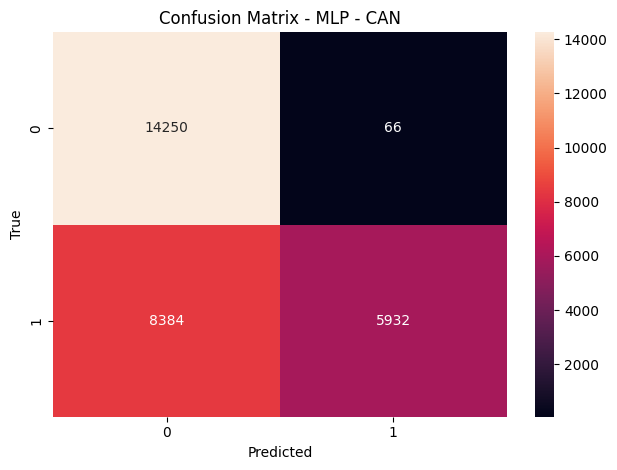

In [ ]:
y_pred_dl = (mlp.predict(X_test_dl) > 0.5).astype(int)
print("\nClassification Report (MLP - CAN):")
print(classification_report(y_test, y_pred_dl))

cm = confusion_matrix(y_test, y_pred_dl)
sns.heatmap(cm, annot=True, fmt='d', cmap='rocket')
plt.title("Confusion Matrix - MLP - CAN")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()


CNN

In [ ]:
def build_cnn(input_shape):
    model = models.Sequential([
        layers.Conv1D(64, kernel_size=1, activation='relu', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

cnn = build_cnn(input_shape)
cnn.fit(X_train_dl, y_train, epochs=10, batch_size=128, validation_split=0.2, callbacks=[early_stop], verbose=1)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


716/716 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6760 - loss: 0.5628 - val_accuracy: 0.7051 - val_loss: 0.5216
Epoch 2/10
716/716 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7013 - loss: 0.5272 - val_accuracy: 0.7055 - val_loss: 0.5179
Epoch 3/10
716/716 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7029 - loss: 0.5230 - val_accuracy: 0.7077 - val_loss: 0.5170
Epoch 4/10
716/716 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7045 - loss: 0.5230 - val_accuracy: 0.7070 - val_loss: 0.5180
Epoch 5/10
716/716 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7011 - loss: 0.5251 - val_accuracy: 0.7062 - val_loss: 0.5184
Epoch 6/10
716/716 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7046 - loss: 0.5199 - val_accuracy: 0.7065 - val_loss: 0.5176


895/895 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step

Classification Report (CNN - CAN):
              precision    recall  f1-score   support

           0       0.63      0.98      0.77     14316
           1       0.95      0.43      0.59     14316

    accuracy                           0.70     28632
   macro avg       0.79      0.70      0.68     28632
weighted avg       0.79      0.70      0.68     28632



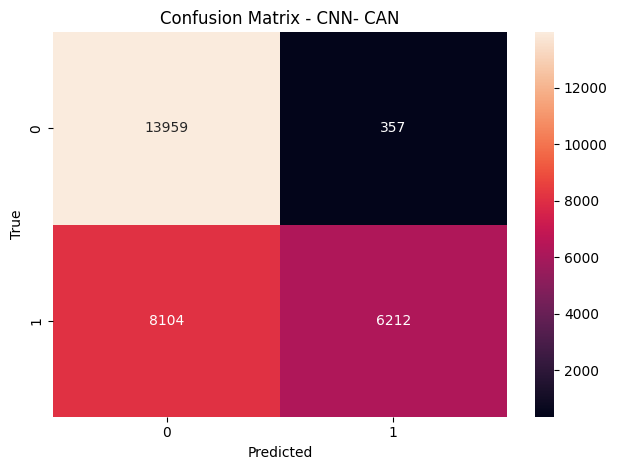

In [ ]:
y_pred_dl = (cnn.predict(X_test_dl) > 0.5).astype(int)
print("\nClassification Report (CNN - CAN):")
print(classification_report(y_test, y_pred_dl))

cm = confusion_matrix(y_test, y_pred_dl)
sns.heatmap(cm, annot=True, fmt='d', cmap='rocket')
plt.title("Confusion Matrix - CNN- CAN")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()


LSTM

In [ ]:
def build_lstm(input_shape):
    model = models.Sequential([
        layers.LSTM(64, input_shape=input_shape, return_sequences=False),
        layers.Dropout(0.3),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

lstm = build_lstm(input_shape)
lstm.fit(X_train_dl, y_train, epochs=10, batch_size=128, validation_split=0.2, callbacks=[early_stop], verbose=1)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


716/716 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6864 - loss: 0.5636 - val_accuracy: 0.7067 - val_loss: 0.5221
Epoch 2/10
716/716 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7061 - loss: 0.5232 - val_accuracy: 0.7066 - val_loss: 0.5207
Epoch 3/10
716/716 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7052 - loss: 0.5243 - val_accuracy: 0.7067 - val_loss: 0.5205
Epoch 4/10
716/716 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7061 - loss: 0.5223 - val_accuracy: 0.7065 - val_loss: 0.5202
Epoch 5/10
716/716 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7019 - loss: 0.5258 - val_accuracy: 0.7067 - val_loss: 0.5194
Epoch 6/10
716/716 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7052 - loss: 0.5212 - val_accuracy: 0.7065 - val_loss: 0.5191
Epoch 7/10
716/716 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.7039 - loss: 0.5235 - val_accuracy: 0.7065 - val_loss: 0.5183
Epoch 8/10
716/716 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7022 - loss: 0.5231 - val_accuracy: 0.7069 - val

CNN + LSTM

In [ ]:
def build_cnn_lstm(input_shape):
    model = models.Sequential([
        layers.Conv1D(32, kernel_size=1, activation='relu', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        layers.LSTM(64),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

cnn_lstm = build_cnn_lstm(input_shape)
cnn_lstm.fit(X_train_dl, y_train, epochs=10, batch_size=128, validation_split=0.2, callbacks=[early_stop], verbose=1)


Epoch 1/10
716/716 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.6926 - loss: 0.5551 - val_accuracy: 0.7067 - val_loss: 0.5208
Epoch 2/10
716/716 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.7054 - loss: 0.5232 - val_accuracy: 0.7067 - val_loss: 0.5195
Epoch 3/10
716/716 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7032 - loss: 0.5231 - val_accuracy: 0.7070 - val_loss: 0.5178
Epoch 4/10
716/716 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7031 - loss: 0.5215 - val_accuracy: 0.7072 - val_loss: 0.5159
Epoch 5/10
716/716 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.6995 - loss: 0.5212 - val_accuracy: 0.7062 - val_loss: 0.5142
Epoch 6/10
716/716 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7051 - loss: 0.5166 - val_accuracy: 0.7067 - val_loss: 0.5121
Epoch 7/10
716/716 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.6988 - loss: 0.5199 - val_accuracy: 0.7065 - val_loss: 0.5113
Epoch 8/10
716/716 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7023 - loss: 0.5174 - val_accura

Perfomance metrics

895/895 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step

 Classification Report (CNN+LSTM - CAN):
              precision    recall  f1-score   support

           0       0.63      1.00      0.77     14316
           1       0.99      0.41      0.58     14316

    accuracy                           0.70     28632
   macro avg       0.81      0.70      0.68     28632
weighted avg       0.81      0.70      0.68     28632



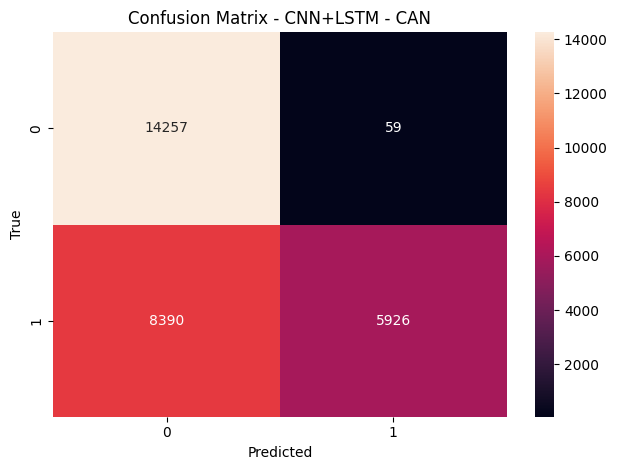

In [ ]:
y_pred_dl = (cnn_lstm.predict(X_test_dl) > 0.5).astype(int)
print("\n Classification Report (CNN+LSTM - CAN):")
print(classification_report(y_test, y_pred_dl))

cm = confusion_matrix(y_test, y_pred_dl)
sns.heatmap(cm, annot=True, fmt='d', cmap='rocket')
plt.title("Confusion Matrix - CNN+LSTM - CAN")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()


Fnal model

In [ ]:
import os
import json
import joblib
import pandas as pd
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

df = can_dataset.copy()  # Replace this with your actual DataFrame

#  Drop label to get features
X = df.drop(columns=['Label'])
y = df['Label']

#  Save feature names
feature_cols = list(X.columns)

# Fit scaler and model
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    n_estimators=200,
    learning_rate=0.05,
    max_depth=7,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=1.0,
    reg_alpha=0.1,
    reg_lambda=1,
    random_state=42,
    n_jobs=-1
)
xgb.fit(X_scaled, y)

# Save everything
domain = "can"
model_dir = f"models/{domain}"
os.makedirs(model_dir, exist_ok=True)

joblib.dump(xgb, f"{model_dir}/model.pkl")
joblib.dump(scaler, f"{model_dir}/scaler.pkl")

metadata = {
    "model_type": "XGBoost",
    "features": feature_cols,
    "domain": "CAN Intrusion Detection"
}
with open(f"{model_dir}/metadata.json", "w") as f:
    json.dump(metadata, f, indent=2)

print(f" Model, scaler, and metadata saved to: {model_dir}")


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:58:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


 Model, scaler, and metadata saved to: models/can


DEPLOYEMNT

In [ ]:
import os
import joblib
import json

# Define the model directory
model_dir = "models/can"
os.makedirs(model_dir, exist_ok=True)

# Manually define the feature columns used in training
feature_cols = [
    'Timestamp', 'DLC', 'DATA0', 'DATA1', 'DATA2', 'DATA3', 'DATA4',
    'DATA5', 'DATA6', 'DATA7', 'DATA_mean', 'DATA_std', 'DATA_sum',
    'DATA_max', 'DATA_min', 'DATA_range', 'DATA_entropy', 'Time_Diff',
    'Time_Diff_Log', 'CAN_ID_encoded', 'DATA_Sum', 'DATA_Mean',
    'DATA_Std', 'DATA_Max', 'DATA_Min', 'DATA_Range', 'DATA_Median',
    'DATA_NonZero_Count'
]

# Save model and scaler
joblib.dump(xgb, f"{model_dir}/model.pkl")
joblib.dump(scaler, f"{model_dir}/scaler.pkl")

# Save metadata
metadata = {
    "model_type": "XGBoost",
    "features": feature_cols,
    "domain": "CAN Intrusion Detection"
}

with open(f"{model_dir}/metadata.json", "w") as f:
    json.dump(metadata, f, indent=2)

print(f"✅ Model, scaler, and metadata saved to: {model_dir}")



✅ Model, scaler, and metadata saved to: models/can


# ICUD (Healthcare Security Dataset)

we have 3 datasets
1. Attacks -contains Attack Network traffic in healthcare use case.
2. Environment Monitoring -contains environment sensors (Normal Network) traffic in healthcare use case.
3. Patient Monitoring - contains ICU patient monitoring sensors (Normal Network) traffic in healthcare use case.

In [ ]:
# Download the dataset from Kaggle
#!kaggle datasets download -d faisalmalik/iot-healthcare-security-dataset


Dataset URL: https://www.kaggle.com/datasets/faisalmalik/iot-healthcare-security-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/16.1M [00:00<?, ?B/s]
100% 16.1M/16.1M [00:00<00:00, 1.03GB/s]


In [ ]:
# Unzip the downloaded zip file
#!unzip -q iot-healthcare-security-dataset.zip -d iot_healthcare_dataset

In [ ]:
import os
import shutil

source_folder = "/content/iot_healthcare_dataset"
destination_folder = "/content/drive/MyDrive/Datasets/iot_healthcare_dataset"

# Ensure destination folder exists
os.makedirs(destination_folder, exist_ok=True)

# Copy everything inside, including subdirectories
for item in os.listdir(source_folder):
    src_path = os.path.join(source_folder, item)
    dst_path = os.path.join(destination_folder, item)

    if os.path.isdir(src_path):
        # If it's a folder, copy the whole directory
        shutil.copytree(src_path, dst_path, dirs_exist_ok=True)
    else:
        # If it's a file, copy the file
        shutil.copy2(src_path, dst_path)

print(f"✅ Entire unzipped dataset (including subfolders) saved to: {destination_folder}")


✅ Entire unzipped dataset (including subfolders) saved to: /content/drive/MyDrive/Datasets/iot_healthcare_dataset


In [ ]:
# Define paths
attack_path = "/content/drive/MyDrive/Datasets/iot_healthcare_dataset/ICUDatasetProcessed/Attack.csv"
env_path = "/content/drive/MyDrive/Datasets/iot_healthcare_dataset/ICUDatasetProcessed/environmentMonitoring.csv"
patient_path = "/content/drive/MyDrive/Datasets/iot_healthcare_dataset/ICUDatasetProcessed/patientMonitoring.csv"

In [ ]:

# Load datasets
df_attack = pd.read_csv(attack_path)
df_environment = pd.read_csv(env_path)
df_patient = pd.read_csv(patient_path)

### Attacks Dataset

In [ ]:
# Quick preview of each dataset
print("Attack.csv")
df_attack.head()

Attack.csv


,frame.time_delta,frame.time_relative,frame.len,ip.src,ip.dst,tcp.srcport,tcp.dstport,tcp.flags,tcp.time_delta,tcp.len,...,mqtt.qos,mqtt.retain,mqtt.topic,mqtt.topic_len,mqtt.ver,mqtt.willmsg_len,ip.proto,ip.ttl,class,label
0,0.000000,0.000000,74,10.16.120.44,10.16.120.72,56808,1883,0x00000002,0.000000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,6,64,Attack,1
1,0.000052,0.000052,74,10.16.120.72,10.16.120.44,1883,56808,0x00000012,0.000052,0,...,0.0,0.0,0.0,0.0,0.0,0.0,6,64,Attack,1
2,0.000008,0.000060,74,10.16.120.44,10.16.120.72,56810,1883,0x00000002,0.000000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,6,64,Attack,1
3,0.000012,0.000072,74,10.16.120.72,10.16.120.44,1883,56810,0x00000012,0.000012,0,...,0.0,0.0,0.0,0.0,0.0,0.0,6,64,Attack,1
4,0.000003,0.000075,74,10.16.120.44,10.16.120.72,56812,1883,0x00000002,0.000000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,6,64,Attack,1


### Environment Monitoring Dataset

In [ ]:
print("\ Environment Monitoring")
df_environment.head()

\ Environment Monitoring


,frame.time_delta,frame.time_relative,frame.len,ip.src,ip.dst,tcp.srcport,tcp.dstport,tcp.flags,tcp.time_delta,tcp.len,...,mqtt.qos,mqtt.retain,mqtt.topic,mqtt.topic_len,mqtt.ver,mqtt.willmsg_len,ip.proto,ip.ttl,class,label
0,0.000000,0.000000,105,10.5.126.151,10.5.126.84,40629,1883,0x00000018,0.000000,37,...,0.0,0.0,0,0.0,4.0,0.0,6,64,environmentMonitoring,0
1,0.000053,0.000053,72,10.5.126.84,10.5.126.151,1883,40629,0x00000018,0.000053,4,...,0.0,0.0,0,0.0,0.0,0.0,6,64,environmentMonitoring,0
2,0.000043,0.000096,105,10.5.126.153,10.5.126.84,45639,1883,0x00000018,0.000000,37,...,0.0,0.0,0,0.0,4.0,0.0,6,64,environmentMonitoring,0
3,0.000020,0.000116,72,10.5.126.84,10.5.126.153,1883,45639,0x00000018,0.000020,4,...,0.0,0.0,0,0.0,0.0,0.0,6,64,environmentMonitoring,0
4,0.000016,0.000132,105,10.5.126.155,10.5.126.84,45093,1883,0x00000018,0.000000,37,...,0.0,0.0,0,0.0,4.0,0.0,6,64,environmentMonitoring,0


### Patient Monitoring

In [ ]:
print("Patient Monitoring")
df_patient.head()

Patient Monitoring


,frame.time_delta,frame.time_relative,frame.len,ip.src,ip.dst,tcp.srcport,tcp.dstport,tcp.flags,tcp.time_delta,tcp.len,...,mqtt.qos,mqtt.retain,mqtt.topic,mqtt.topic_len,mqtt.ver,mqtt.willmsg_len,ip.proto,ip.ttl,class,label
0,0.000000,0.000000,105,10.5.126.141,10.5.126.56,35161,1883,0x00000018,0.0,37,...,0.0,0.0,0,0.0,4.0,0.0,6,64,patientMonitoring,0
1,0.000249,0.000249,105,10.5.126.143,10.5.126.56,34237,1883,0x00000018,0.0,37,...,0.0,0.0,0,0.0,4.0,0.0,6,64,patientMonitoring,0
2,0.000037,0.000286,105,10.5.126.145,10.5.126.56,46623,1883,0x00000018,0.0,37,...,0.0,0.0,0,0.0,4.0,0.0,6,64,patientMonitoring,0
3,0.000034,0.000320,105,10.5.126.147,10.5.126.56,45663,1883,0x00000018,0.0,37,...,0.0,0.0,0,0.0,4.0,0.0,6,64,patientMonitoring,0
4,0.000017,0.000337,105,10.5.126.141,10.5.126.56,38901,1883,0x00000018,0.0,37,...,0.0,0.0,0,0.0,4.0,0.0,6,64,patientMonitoring,0


Merging the 3 datasets

When Merging its important to maintain data consistency therefore upon studying the 3 datasets we have to make a label for the environment and patient monitoring csv assuming to be normal occurency that is 0 while the attack csv remains to be label as 1

In [ ]:
#Adding a label column
# For environment_df, and Patient_df ensure 'label' is 0 for normal activity
# first of all we have to check if the label exists or not before adding
# If it exists, ensure all values are 0 if this dataset is purely normal traffic
if 'label' not in df_environment.columns:
    df_environment['label'] = 0
else:

    df_environment['label'] = 0

if 'label' not in df_patient.columns:
    df_patient['label'] = 0
else:

    df_patient['label'] = 0

# Concatenate the three DataFrames
merged_df = pd.concat([df_attack, df_environment, df_patient], ignore_index=True)

# Display the value counts of the 'label' column in the merged DataFrame to verify consistency
print("Value counts for 'label' in the merged dataset:")
print(merged_df['label'].value_counts())

# Save the merged DataFrame to a new CSV file
merged_df.to_csv('merged_hospital_dataset.csv', index=False)

print("\nDatasets merged successfully into 'merged_hospital_dataset.csv'")

Value counts for 'label' in the merged dataset:
label
0    108568
1     80126
Name: count, dtype: int64

Datasets merged successfully into 'merged_hospital_dataset.csv'


The Merged Dataset

In [ ]:
df_merged_hospital_dataset = pd.read_csv("merged_hospital_dataset.csv")

In [ ]:
df_merged_hospital_dataset.head()

,frame.time_delta,frame.time_relative,frame.len,ip.src,ip.dst,tcp.srcport,tcp.dstport,tcp.flags,tcp.time_delta,tcp.len,...,mqtt.qos,mqtt.retain,mqtt.topic,mqtt.topic_len,mqtt.ver,mqtt.willmsg_len,ip.proto,ip.ttl,class,label
0,0.000000,0.000000,74,10.16.120.44,10.16.120.72,56808,1883,0x00000002,0.000000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,6,64,Attack,1
1,0.000052,0.000052,74,10.16.120.72,10.16.120.44,1883,56808,0x00000012,0.000052,0,...,0.0,0.0,0.0,0.0,0.0,0.0,6,64,Attack,1
2,0.000008,0.000060,74,10.16.120.44,10.16.120.72,56810,1883,0x00000002,0.000000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,6,64,Attack,1
3,0.000012,0.000072,74,10.16.120.72,10.16.120.44,1883,56810,0x00000012,0.000012,0,...,0.0,0.0,0.0,0.0,0.0,0.0,6,64,Attack,1
4,0.000003,0.000075,74,10.16.120.44,10.16.120.72,56812,1883,0x00000002,0.000000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,6,64,Attack,1


CLEANING

In [ ]:
df_merged_hospital_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188694 entries, 0 to 188693
Data columns (total 52 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   frame.time_delta       188694 non-null  float64
 1   frame.time_relative    188694 non-null  float64
 2   frame.len              188694 non-null  int64  
 3   ip.src                 188694 non-null  object 
 4   ip.dst                 188694 non-null  object 
 5   tcp.srcport            188694 non-null  int64  
 6   tcp.dstport            188694 non-null  int64  
 7   tcp.flags              188694 non-null  object 
 8   tcp.time_delta         188694 non-null  float64
 9   tcp.len                188694 non-null  int64  
 10  tcp.ack                188694 non-null  int64  
 11  tcp.connection.fin     188694 non-null  float64
 12  tcp.connection.rst     188694 non-null  float64
 13  tcp.connection.sack    188694 non-null  float64
 14  tcp.connection.syn     188694 non-nu

In [ ]:
df_merged_hospital_dataset.isnull().sum()

,0
frame.time_delta,0
frame.time_relative,0
frame.len,0
ip.src,0
ip.dst,0
tcp.srcport,0
tcp.dstport,0
tcp.flags,0
tcp.time_delta,0
tcp.len,0


checking the shape of merged dataset

In [ ]:
df_merged_hospital_dataset.shape

(188694, 52)

**Label distribution**

In [ ]:
label_counts = df_merged_hospital_dataset['label'].value_counts()
print(label_counts)


label
0    108568
1     80126
Name: count, dtype: int64


In [ ]:
# Map numeric labels to string for better visualization
df_merged_hospital_dataset['label'] = df_merged_hospital_dataset['label'].map({0: 'Normal', 1: 'Attack'})


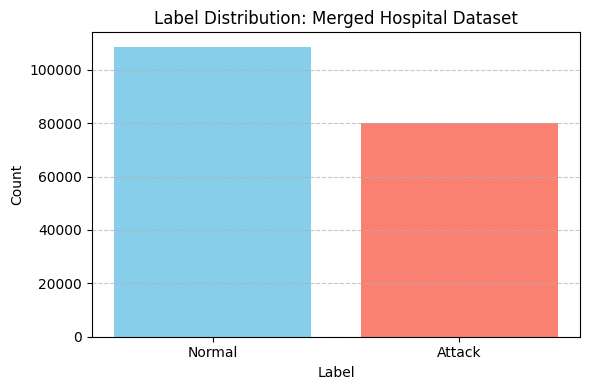

In [ ]:
import matplotlib.pyplot as plt

# Get value counts
label_counts = df_merged_hospital_dataset['label'].value_counts()
label_names = label_counts.index.astype(str)

# Color mapping
colors = ['skyblue' if label == 'Normal' else 'salmon' for label in label_names]

# Plot
plt.figure(figsize=(6, 4))
plt.bar(label_names, label_counts.values, color=colors)
plt.title('Label Distribution: Merged Hospital Dataset')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Balance Labels**

In [ ]:
from sklearn.utils import resample

# Separate classes
df_normal = df_merged_hospital_dataset[df_merged_hospital_dataset['label'] == 'Normal']
df_attack = df_merged_hospital_dataset[df_merged_hospital_dataset['label'] == 'Attack']

# Upsample Attack to match Normal count
df_attack_upsampled = resample(
    df_attack,
    replace=True,
    n_samples=len(df_normal),
    random_state=42
)

# Combine and overwrite original DataFrame
df_merged_hospital_dataset = pd.concat([df_normal, df_attack_upsampled])
df_merged_hospital_dataset = df_merged_hospital_dataset.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
df_merged_hospital_dataset['label'].value_counts()

,count
label,
Attack,108568
Normal,108568


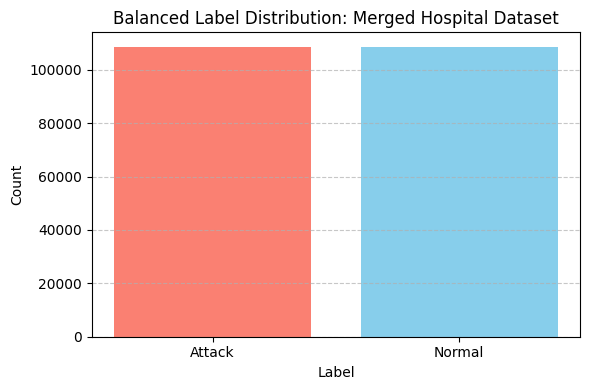

In [ ]:
import matplotlib.pyplot as plt

label_counts = df_merged_hospital_dataset['label'].value_counts()
colors = ['skyblue' if label == 'Normal' else 'salmon' for label in label_counts.index]

plt.figure(figsize=(6, 4))
plt.bar(label_counts.index, label_counts.values, color=colors)
plt.title('Balanced Label Distribution: Merged Hospital Dataset')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**saving our final merged dataset**

In [ ]:
import os

# Set destination folder inside Google Drive
destination_folder = "/content/drive/MyDrive/Datasets/iot_healthcare_dataset"

# Make sure folder exists
os.makedirs(destination_folder, exist_ok=True)

# Full path to save
save_path = os.path.join(destination_folder, 'df_merged_hospital_dataset.csv')

# Save to CSV
df_merged_hospital_dataset.to_csv(save_path, index=False)

print(f"✅ Merged hospital dataset saved permanently at:\n{save_path}")


✅ Merged hospital dataset saved permanently at:
/content/drive/MyDrive/Datasets/iot_healthcare_dataset/df_merged_hospital_dataset.csv


In [ ]:
import pandas as pd
df_final_hospital = pd.read_csv("/content/drive/MyDrive/Datasets/iot_healthcare_dataset/df_merged_hospital_dataset.csv")

In [ ]:
df_final_hospital.head()

,frame.time_delta,frame.time_relative,frame.len,ip.src,ip.dst,tcp.srcport,tcp.dstport,tcp.flags,tcp.time_delta,tcp.len,...,mqtt.qos,mqtt.retain,mqtt.topic,mqtt.topic_len,mqtt.ver,mqtt.willmsg_len,ip.proto,ip.ttl,class,label
0,0.000001,20.313166,135,192.168.1.90,192.168.1.91,54564,1883,0x00000018,0.000001,81,...,1.0,0.0,mqtt-malaria/beem.loadr-MBP-di-Ivan-5.lan-5476...,66.0,0.0,0.0,6,64,Attack,Attack
1,0.000003,0.202427,66,10.16.120.44,10.16.120.72,57330,1883,0x00000010,0.000212,0,...,0.0,0.0,0.0,0.0,0.0,0.0,6,64,Attack,Attack
2,0.000000,58.707184,153,192.168.1.90,192.168.1.91,54564,1883,0x00000018,0.000000,99,...,1.0,0.0,mqtt-malaria/beem.loadr-MBP-di-Ivan-5.lan-5476...,66.0,0.0,0.0,6,64,Attack,Attack
3,0.000025,43.432620,54,192.168.1.90,192.168.1.91,54571,1883,0x00000010,0.000025,0,...,0.0,0.0,0,0.0,0.0,0.0,6,64,Attack,Attack
4,0.000187,4980.054272,70,10.5.126.167,10.5.126.56,33251,1883,0x00000018,1.007589,2,...,0.0,0.0,0,0.0,0.0,0.0,6,64,patientMonitoring,Normal


data cleaning and preprocessing

In [ ]:
import pandas as pd

# Copy dataset
df_hospital = df_final_hospital.copy()

# Drop string/object columns that are not useful for deep learning
df_hospital = df_hospital.drop(columns=['ip.src', 'ip.dst', 'mqtt.topic', 'label'], errors='ignore')


In [ ]:
# Show object (categorical) columns
print("Categorical columns:", df_hospital.select_dtypes(include='object').columns.tolist())


Categorical columns: ['tcp.flags', 'tcp.payload', 'tcp.checksum', 'mqtt.clientid', 'mqtt.conack.flags', 'mqtt.conflags', 'mqtt.hdrflags', 'mqtt.msg', 'class']


encoding

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Make a copy
df_hosp = df_final_hospital.copy()

# Drop very high-cardinality or non-informative columns
drop_cols = [
    'ip.src', 'ip.dst', 'mqtt.topic', 'mqtt.clientid',
    'mqtt.msg', 'tcp.payload', 'tcp.checksum', 'label'
]
df_hosp.drop(columns=drop_cols, errors='ignore', inplace=True)

# Label encode low-cardinality categorical columns
label_cols = ['tcp.flags', 'mqtt.conack.flags', 'mqtt.conflags', 'mqtt.hdrflags']
for col in label_cols:
    if df_hosp[col].dtype == 'object':
        le = LabelEncoder()
        df_hosp[col] = le.fit_transform(df_hosp[col].astype(str))

# Encode target
df_hosp['class'] = df_hosp['class'].apply(lambda x: 1 if x == 'Attack' else 0)

df_hosp.head()

,frame.time_delta,frame.time_relative,frame.len,tcp.srcport,tcp.dstport,tcp.flags,tcp.time_delta,tcp.len,tcp.ack,tcp.connection.fin,...,mqtt.len,mqtt.msgtype,mqtt.qos,mqtt.retain,mqtt.topic_len,mqtt.ver,mqtt.willmsg_len,ip.proto,ip.ttl,class
0,0.000001,20.313166,135,54564,1883,6,0.000001,81,12053,0.0,...,167.0,3.0,1.0,0.0,66.0,0.0,0.0,6,64,1
1,0.000003,0.202427,66,57330,1883,2,0.000212,0,5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,64,1
2,0.000000,58.707184,153,54564,1883,6,0.000000,99,26153,0.0,...,178.0,3.0,1.0,0.0,66.0,0.0,0.0,6,64,1
3,0.000025,43.432620,54,54571,1883,2,0.000025,0,19901,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,64,1
4,0.000187,4980.054272,70,33251,1883,6,1.007589,2,169,0.0,...,0.0,12.0,0.0,0.0,0.0,0.0,0.0,6,64,0


In [ ]:

# Save path in your Drive
save_path = "/content/drive/MyDrive/Datasets/iot_healthcare_dataset/df_hospitalmerged_dataset.csv"

# Save the DataFrame
df_hosp.to_csv(save_path, index=False)

print(f" Saved to: {save_path}")


 Saved to: /content/drive/MyDrive/Datasets/iot_healthcare_dataset/df_hospitalmerged_dataset.csv


In [ ]:
feature_cols = df_hosp.drop(columns=['class']).columns.tolist()
feature_cols

['frame.time_delta',
 'frame.time_relative',
 'frame.len',
 'tcp.srcport',
 'tcp.dstport',
 'tcp.flags',
 'tcp.time_delta',
 'tcp.len',
 'tcp.ack',
 'tcp.connection.fin',
 'tcp.connection.rst',
 'tcp.connection.sack',
 'tcp.connection.syn',
 'tcp.flags.ack',
 'tcp.flags.fin',
 'tcp.flags.push',
 'tcp.flags.reset',
 'tcp.flags.syn',
 'tcp.flags.urg',
 'tcp.hdr_len',
 'tcp.pdu.size',
 'tcp.window_size_value',
 'mqtt.clientid_len',
 'mqtt.conack.flags',
 'mqtt.conack.val',
 'mqtt.conflag.passwd',
 'mqtt.conflag.qos',
 'mqtt.conflag.reserved',
 'mqtt.conflag.retain',
 'mqtt.conflag.willflag',
 'mqtt.conflags',
 'mqtt.dupflag',
 'mqtt.hdrflags',
 'mqtt.kalive',
 'mqtt.len',
 'mqtt.msgtype',
 'mqtt.qos',
 'mqtt.retain',
 'mqtt.topic_len',
 'mqtt.ver',
 'mqtt.willmsg_len',
 'ip.proto',
 'ip.ttl']

**Model fitting**

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
1086/1086 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9808 - loss: 0.0818 - val_accuracy: 1.0000 - val_loss: 3.8852e-04
Epoch 2/15
1086/1086 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9998 - loss: 6.3756e-04 - val_accuracy: 1.0000 - val_loss: 3.4874e-04
Epoch 3/15
1086/1086 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9999 - loss: 3.6496e-04 - val_accuracy: 1.0000 - val_loss: 2.4526e-05
Epoch 4/15
1086/1086 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 1.0000 - loss: 1.0253e-04 - val_accuracy: 1.0000 - val_loss: 2.5847e-06
Epoch 5/15
1086/1086 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 1.0000 - loss: 1.5275e-05 - val_accuracy: 1.0000 - val_loss: 2.7387e-07
Epoch 6/15
1086/1086 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 1.0000 - loss: 3.5373e-06 - val_accuracy: 1.0000 - val_loss: 1.0014e-07
Epoch 7/15
1086/1086 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 1.0000 - loss: 4.0009e-06 - val_accuracy: 1.0000 - val_loss: 4.1088e-08
Epoch 8/15
1086/1086 ━━━━━━━━━━━━━━

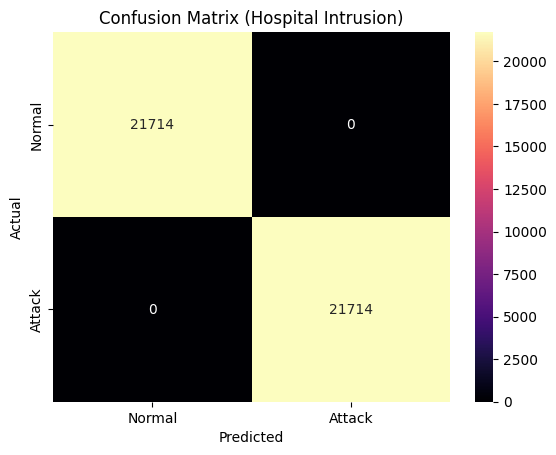

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras import layers, models, callbacks, optimizers
import seaborn as sns
import matplotlib.pyplot as plt

# Copy clean DataFrame
df = df_hosp.copy()

# Features and target
X = df.drop(columns=['class']).values
y = df['class'].values  # 0: Normal, 1: Attack

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape for CNN+LSTM input: (samples, timesteps, features)
X_dl = np.expand_dims(X_scaled, axis=1)

# Train/test split
X_train_dl, X_test_dl, y_train, y_test = train_test_split(
    X_dl, y, test_size=0.2, stratify=y, random_state=42
)

# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))

# Build CNN + LSTM model
def build_final_cnn_lstm(input_shape):
    model = models.Sequential([
        layers.Conv1D(32, kernel_size=1, activation='relu', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.Dropout(0.1),
        layers.LSTM(64, return_sequences=False),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.4),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Train model
model = build_final_cnn_lstm(input_shape=X_train_dl.shape[1:])
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    X_train_dl, y_train,
    epochs=15,
    batch_size=128,
    validation_split=0.2,
    class_weight=class_weight_dict,
    callbacks=[early_stop],
    verbose=1
)

# Predict
y_pred = (model.predict(X_test_dl) > 0.5).astype("int32")

# Evaluation
print("\n📊 Classification Report (Hospital Intrusion):")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='magma', xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Hospital Intrusion)')
plt.show()


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


/tmp/ipython-input-64-2290223286.py:19: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


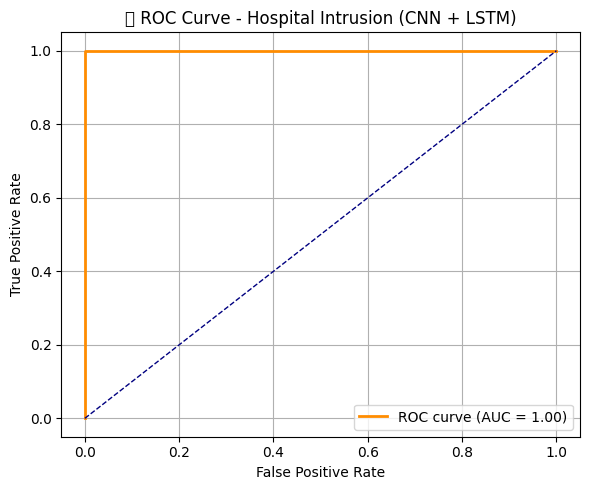

In [ ]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities
y_pred_prob = model.predict(X_test_dl).ravel()

# Compute ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("📈 ROC Curve - Hospital Intrusion (CNN + LSTM)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


ploting training and validation loss

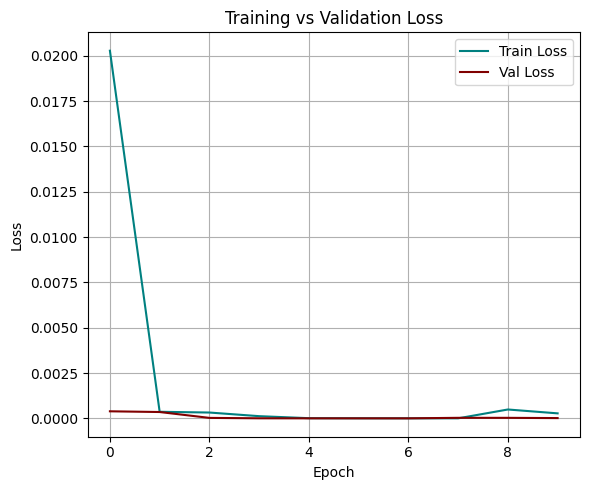

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(6, 5))
plt.plot(history.history['loss'], label='Train Loss', color='teal')
plt.plot(history.history['val_loss'], label='Val Loss', color='maroon')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


deployment

In [ ]:
import os
import json
import joblib
from tensorflow.keras.models import load_model

# Define path
domain = "hospital"
model_dir = f"models/{domain}"
os.makedirs(model_dir, exist_ok=True)

# Save Keras model
model.save(f"{model_dir}/hospital_cnn_lstm_model.keras")

# Save scaler
joblib.dump(scaler, f"{model_dir}/hospital_intrusion_scaler.pkl")

# Save metadata (include training features)
metadata = {
    "model_type": "CNN-LSTM",
    "features": list(X.columns),  # Replace X with your actual training DataFrame
    "domain": "IoT Hospital Intrusion"
}
with open(f"{model_dir}/metadata.json", "w") as f:
    json.dump(metadata, f, indent=2)

print(f"Model, scaler, and metadata saved in: {model_dir}")



Model, scaler, and metadata saved in: models/hospital


**Features**

In [ ]:
features_hospital = df_hosp.drop(columns=['class']).columns.tolist()
print(", ".join(features_hospital))


frame.time_delta, frame.time_relative, frame.len, tcp.srcport, tcp.dstport, tcp.flags, tcp.time_delta, tcp.len, tcp.ack, tcp.connection.fin, tcp.connection.rst, tcp.connection.sack, tcp.connection.syn, tcp.flags.ack, tcp.flags.fin, tcp.flags.push, tcp.flags.reset, tcp.flags.syn, tcp.flags.urg, tcp.hdr_len, tcp.pdu.size, tcp.window_size_value, mqtt.clientid_len, mqtt.conack.flags, mqtt.conack.val, mqtt.conflag.passwd, mqtt.conflag.qos, mqtt.conflag.reserved, mqtt.conflag.retain, mqtt.conflag.willflag, mqtt.conflags, mqtt.dupflag, mqtt.hdrflags, mqtt.kalive, mqtt.len, mqtt.msgtype, mqtt.qos, mqtt.retain, mqtt.topic_len, mqtt.ver, mqtt.willmsg_len, ip.proto, ip.ttl


frame.time_delta, frame.time_relative, frame.len, tcp.srcport, tcp.dstport, tcp.flags, tcp.time_delta, tcp.len, tcp.ack, tcp.connection.fin, tcp.connection.rst, tcp.connection.sack, tcp.connection.syn, tcp.flags.ack, tcp.flags.fin, tcp.flags.push, tcp.flags.reset, tcp.flags.syn, tcp.flags.urg, tcp.hdr_len, tcp.pdu.size, tcp.window_size_value, mqtt.clientid_len, mqtt.conack.flags, mqtt.conack.val, mqtt.conflag.passwd, mqtt.conflag.qos, mqtt.conflag.reserved, mqtt.conflag.retain, mqtt.conflag.willflag, mqtt.conflags, mqtt.dupflag, mqtt.hdrflags, mqtt.kalive, mqtt.len, mqtt.msgtype, mqtt.qos, mqtt.retain, mqtt.topic_len, mqtt.ver, mqtt.willmsg_len, ip.proto, ip.ttl

0.001, 12.34, 66, 1883, 443, 24, 0.005, 52, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 20, 100, 65535, 10, 1, 0, 0, 0, 0, 1, 1, 0, 0, 32, 60, 3, 8, 1, 0, 10, 4, 0, 6, 64


0.002, 15.24, 60, 1883, 443, 24, 0.004, 52, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 20, 100, 65535, 12, 1, 0, 0, 0, 0, 1, 1, 0, 0, 32, 60, 3, 8, 1, 0, 10, 4, 0, 6, 64



likely normal

0.0001, 0.54, 1514, 0, 0, 0, 0.00001, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 10, 1514, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 15, 14, 0, 1, 5, 0, 1, 17, 1



likely attack


0.045, 123.56, 98, 568, 80, 20, 0.002, 80, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 24, 200, 32768, 5, 1, 0, 0, 1, 1, 0, 0, 1, 0, 16, 100, 2, 7, 0, 1, 8, 5, 1, 17, 64

mixed case

# Model Predictions

## **CAN Model**

In [ ]:
import pandas as pd
import joblib
import json

# Load model, scaler, and metadata
domain = "can"
model_path = f"models/{domain}"
model = joblib.load(f"{model_path}/model.pkl")
scaler = joblib.load(f"{model_path}/scaler.pkl")

with open(f"{model_path}/metadata.json") as f:
    meta = json.load(f)

feature_cols = meta['features']


In [ ]:
sample_input = pd.DataFrame([[
    123456.78, 8, 255, 0, 128, 255, 0, 64, 128, 255, 0,
    127.5, 75.2, 1020, 255, 0, 255, 0.85, 1.2, 13,
    1020, 127.5, 75.2, 255, 0, 255, 127.5, 7
]], columns=feature_cols)

# Preprocess & Predict
sample_scaled = scaler.transform(sample_input)
prediction = model.predict(sample_scaled)[0]
confidence = model.predict_proba(sample_scaled)[0][1]

# =Output
print(f"Prediction: {'Attack' if prediction == 1 else 'Normal'}")
print(f"Confidence: {confidence:.4f}")

Prediction: Normal
Confidence: 0.4375


## **Iot intrusion model**

In [ ]:
import joblib
import json
import numpy as np
import pandas as pd

# Set the domain
domain = 'iot_logistic'
path = f'models/{domain}'

# Load model components
model = joblib.load(f'{path}/model.pkl')
scaler = joblib.load(f'{path}/scaler.pkl')
label_encoder = joblib.load(f'{path}/label_encoder.pkl')

# Load feature names
with open(f'{path}/metadata.json') as f:
    metadata = json.load(f)
feature_cols = metadata['features']


In [ ]:
# Example  with realistic values for your dataset
sample_input = pd.DataFrame([[
    0.5, 1.2, 0.0, 0.75, 0.8, 0.9, 0.4, 0.3, 1.0, 0.0,
    0.1, 0.2, 0.3, 0.1, 0.6, 0.3, 0.7, 0.4, 0.6, 0.5,
    0.2, 0.8, 0.9, 0.4, 0.3, 0.1, 0.2, 0.6, 0.3, 0.7,
    0.5, 0.9, 0.2, 0.6, 0.8, 0.1, 0.3, 0.7, 0.6, 0.5,
    0.2, 0.1, 0.9, 0.8, 0.7, 0.6
]], columns=feature_cols)


# Scale input
sample_scaled = scaler.transform(sample_input)

# Predict
pred = model.predict(sample_scaled)[0]
proba = model.predict_proba(sample_scaled)[0]

# Decode prediction
prediction_label = label_encoder.inverse_transform([pred])[0]
confidence = np.max(proba)

# Output
print(f"Prediction: {prediction_label}")
print(f"Confidence: {confidence:.2f}")

Prediction: Attack
Confidence: 1.00


## **ICUD Model**

In [ ]:
import pandas as pd
import numpy as np
import joblib
import json
from tensorflow.keras.models import load_model

# Load model, scaler, and metadata
model = load_model("/content/models/hospital/hospital_cnn_lstm_model.keras")
scaler = joblib.load("/content/models/hospital/hospital_intrusion_scaler.pkl")

with open("/content/models/hospital/metadata.json") as f:
    metadata = json.load(f)

feature_cols = metadata["features"]

In [ ]:
print("Loaded feature count:", len(feature_cols))


Loaded feature count: 28


In [ ]:
import pandas as pd
import numpy as np

# Use the correct feature list
feature_cols = [  # 43 features
 'frame.time_delta', 'frame.time_relative', 'frame.len', 'tcp.srcport',
 'tcp.dstport', 'tcp.flags', 'tcp.time_delta', 'tcp.len', 'tcp.ack',
 'tcp.connection.fin', 'tcp.connection.rst', 'tcp.connection.sack',
 'tcp.connection.syn', 'tcp.flags.ack', 'tcp.flags.fin', 'tcp.flags.push',
 'tcp.flags.reset', 'tcp.flags.syn', 'tcp.flags.urg', 'tcp.hdr_len',
 'tcp.pdu.size', 'tcp.window_size_value', 'mqtt.clientid_len',
 'mqtt.conack.flags', 'mqtt.conack.val', 'mqtt.conflag.passwd',
 'mqtt.conflag.qos', 'mqtt.conflag.reserved', 'mqtt.conflag.retain',
 'mqtt.conflag.willflag', 'mqtt.conflags', 'mqtt.dupflag', 'mqtt.hdrflags',
 'mqtt.kalive', 'mqtt.len', 'mqtt.msgtype', 'mqtt.qos', 'mqtt.retain',
 'mqtt.topic_len', 'mqtt.ver', 'mqtt.willmsg_len', 'ip.proto', 'ip.ttl'
]

In [ ]:
# Your sample input with 43 values
sample_values = [
    0.002, 15.24, 60, 1883, 443, 24, 0.004, 52, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 20,
    100, 65535, 12, 1, 0, 0, 0, 0, 1, 1, 0, 0, 32, 60, 3, 8, 1, 0, 10, 4, 0, 6, 64
]

assert len(sample_values) == len(feature_cols)

# Create DataFrame
sample_input = pd.DataFrame([sample_values], columns=feature_cols)

# Scale and reshape
scaled = scaler.transform(sample_input)
reshaped = scaled.reshape((1, 1, scaled.shape[1]))

# Predict
pred = model.predict(reshaped)
confidence = float(pred[0][0])
label = "Attack" if confidence > 0.5 else "Normal"

print(f"Prediction: {label}")
print(f"Confidence: {confidence:.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
Prediction: Attack
Confidence: 1.0000


## **NSL-KDD Model**

In [ ]:
import joblib
import json
import pandas as pd

# Load model and scaler
domain = 'nsl_kdd'
model = joblib.load(f'models/{domain}/model.pkl')
scaler = joblib.load(f'models/{domain}/scaler.pkl')

# Load metadata to get feature names
with open(f'models/{domain}/metadata.json') as f:
    metadata = json.load(f)

feature_cols = metadata['features']



In [ ]:
# Raw sample input (54 values from you)
base_values = [
    0, 181, 5450, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    511, 511, 0.00, 0.00, 0.00, 0.00, 1.00, 0.00, 0.00,
    255, 255, 1.00, 0.00, 0.05, 0.00, 0.00, 0.00, 0.00, 0.00,
    1, 0,   # protocol_type_tcp, protocol_type_udp
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0  # service_X11 to service_echo (partial)
]



In [ ]:
# Pad remaining values with zeros to match total feature count
sample_values = base_values + [0] * (len(feature_cols) - len(base_values))

# Sanity check
assert len(sample_values) == len(feature_cols), f"❌ Expected {len(feature_cols)} features, got {len(sample_values)}"

# Build DataFrame
sample_df = pd.DataFrame([sample_values], columns=feature_cols)

# Scale input
scaled_input = scaler.transform(sample_df)

# Predict
prediction = model.predict(scaled_input)[0]
label = "Attack" if prediction == 1 else "Normal"

print(f"✅ Prediction: {label}")


✅ Prediction: Normal


## Streamlit.app code

In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
import joblib
import json
from tensorflow.keras.models import load_model

st.set_page_config(page_title="Intrusion Detection Dashboard", layout="wide")
st.title("🚨 Ensemble Intrusion Detection System")
st.markdown("Select a model and input sample features to classify network traffic as Normal or Attack.")

#  Sidebar to choose the model
domain = st.sidebar.selectbox("Select Domain", ["can", "iot_logistic", "hospital", "nsl_kdd"])

# Load model and metadata
model = None
scaler = None
feature_cols = []
label_encoder = None

model_path = f"models/{domain}"

if domain == "hospital":
    model = load_model(f"{model_path}/hospital_cnn_lstm_model.keras")
    scaler = joblib.load(f"{model_path}/hospital_intrusion_scaler.pkl")
    feature_cols = [
        'frame.time_delta', 'frame.time_relative', 'frame.len', 'tcp.srcport',
        'tcp.dstport', 'tcp.flags', 'tcp.time_delta', 'tcp.len', 'tcp.ack',
        'tcp.connection.fin', 'tcp.connection.rst', 'tcp.connection.sack',
        'tcp.connection.syn', 'tcp.flags.ack', 'tcp.flags.fin', 'tcp.flags.push',
        'tcp.flags.reset', 'tcp.flags.syn', 'tcp.flags.urg', 'tcp.hdr_len',
        'tcp.pdu.size', 'tcp.window_size_value', 'mqtt.clientid_len',
        'mqtt.conack.flags', 'mqtt.conack.val', 'mqtt.conflag.passwd',
        'mqtt.conflag.qos', 'mqtt.conflag.reserved', 'mqtt.conflag.retain',
        'mqtt.conflag.willflag', 'mqtt.conflags', 'mqtt.dupflag', 'mqtt.hdrflags',
        'mqtt.kalive', 'mqtt.len', 'mqtt.msgtype', 'mqtt.qos', 'mqtt.retain',
        'mqtt.topic_len', 'mqtt.ver', 'mqtt.willmsg_len', 'ip.proto', 'ip.ttl'
    ]
else:
    model = joblib.load(f"{model_path}/model.pkl")
    scaler = joblib.load(f"{model_path}/scaler.pkl")
    with open(f"{model_path}/metadata.json") as f:
        meta = json.load(f)
    feature_cols = meta["features"]
    if "classes" in meta:
        label_encoder = joblib.load(f"{model_path}/label_encoder.pkl")

    if domain == "nsl_kdd":
        base_values = [
            0, 181, 5450, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            511, 511, 0.00, 0.00, 0.00, 0.00, 1.00, 0.00, 0.00,
            255, 255, 1.00, 0.00, 0.05, 0.00, 0.00, 0.00, 0.00, 0.00,
            1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
        ]
        if len(base_values) < len(feature_cols):
            sample_inputs_nsl = base_values + [0] * (len(feature_cols) - len(base_values))
        else:
            sample_inputs_nsl = base_values[:len(feature_cols)]

# Collect input
st.subheader(f"🧪 Input Features for: `{domain.upper()}`")

sample_inputs = {
    "hospital": [
        0.002, 15.24, 60, 1883, 443, 24, 0.004, 52, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 20,
        100, 65535, 12, 1, 0, 0, 0, 0, 1, 1, 0, 0, 32, 60, 3, 8, 1, 0, 10, 4, 0, 6, 64
    ],
    "can": [
        123456.78, 8, 255, 0, 128, 255, 0, 64, 128, 255, 0,
        127.5, 75.2, 1020, 255, 0, 255, 0.85, 1.2, 13,
        1020, 127.5, 75.2, 255, 0, 255, 127.5, 7
    ],
    "iot_logistic": [
        0.5, 1.2, 0.0, 0.75, 0.8, 0.9, 0.4, 0.3, 1.0, 0.0,
        0.1, 0.2, 0.3, 0.1, 0.6, 0.3, 0.7, 0.4, 0.6, 0.5,
        0.2, 0.8, 0.9, 0.4, 0.3, 0.1, 0.2, 0.6, 0.3, 0.7,
        0.5, 0.9, 0.2, 0.6, 0.8, 0.1, 0.3, 0.7, 0.6, 0.5,
        0.2, 0.1, 0.9, 0.8, 0.7, 0.6
    ],
    "nsl_kdd": sample_inputs_nsl if domain == "nsl_kdd" else []
}

inputs = []
input_method = st.radio("Choose input method:", ["Manual Input", "Use Sample Input", "Paste Comma-Separated Input", "Upload CSV"])

if input_method == "Upload CSV":
    uploaded_file = st.file_uploader("📁 Upload a CSV file with feature values", type="csv")
    if uploaded_file:
        input_df = pd.read_csv(uploaded_file)
        if list(input_df.columns) != feature_cols:
            st.error("❌ Column mismatch. Please upload a file with correct feature columns.")
            st.stop()
        inputs = input_df.iloc[0].tolist()
elif input_method == "Use Sample Input":
    if domain in sample_inputs:
        inputs = sample_inputs[domain]
        st.success("✅ Sample input loaded.")
    else:
        st.warning("⚠️ No sample input defined for this domain.")
elif input_method == "Paste Comma-Separated Input":
    raw_input = st.text_area("Paste comma-separated values matching the required feature order:")
    if raw_input:
        try:
            values = [float(x.strip()) for x in raw_input.split(",")]
            if len(values) != len(feature_cols):
                st.error(f"❌ Expected {len(feature_cols)} values, but got {len(values)}")
            else:
                inputs = values
                st.success("✅ Parsed input successfully.")
        except:
            st.error("❌ Invalid input. Ensure all values are numeric and comma-separated.")
else:
    cols = st.columns(2)
    for idx, col in enumerate(feature_cols):
        default = 0.0 if "int" in col or "len" in col or "port" in col else 0.1
        val = cols[idx % 2].number_input(f"{col}", value=default, format="%f")
        inputs.append(val)

# --- Predict ---
if st.button("🔍 Predict") and inputs:
    try:
        input_df = pd.DataFrame([inputs], columns=feature_cols)
        scaled = scaler.transform(input_df)

        if domain == "hospital":
            reshaped = scaled.reshape((1, 1, scaled.shape[1]))
            pred = model.predict(reshaped)[0][0]
            label = "Attack" if pred > 0.5 else "Normal"
            confidence = float(pred)
        else:
            pred = model.predict(scaled)[0]
            if hasattr(model, 'predict_proba'):
                confidence = model.predict_proba(scaled)[0][int(pred)]
            else:
                confidence = 1.0
            label = pred
            if label_encoder:
                label = label_encoder.inverse_transform([pred])[0]

        st.success(f"✅ Prediction: **{label}**")
        st.metric("Confidence", f"{confidence:.4f}")

    except Exception as e:
        st.error(f"❌ Error during prediction: {e}")

#.venv\Scripts\activate

#streamlit run app.py

